In [117]:
options(warn = -1)

# Predict Bike-Sharing need in Metropolitan Area


Author information
- Family Name: Nguyen
- Given Name: Thanh Chung

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- tidyverse
- reshape2
- PerformanceAnalytics 
- gridExtra
- lattice
- glmnet
- rpart
- rattle
- rpart.plot
- mlr
- knitr
- xgboost
- Metrics
- RColorBrewer
- rattle
- caret

In [118]:
#install.packages("tidyverse")
library(tidyverse)
library(reshape2)
# library(GGally)
# library(reshape)
library(PerformanceAnalytics)
library(gridExtra)
library(corrplot)
require(gridExtra) # also loads grid
require(lattice)
library(glmnet)
library(rpart)
library(rattle)
# library(tidymodels)
library(rpart.plot)
library(mlr)       # ML package (also some data manipulation)
library(knitr)     # just using this for kable() to make pretty tables)
library(xgboost)
library(Metrics)
# library(randomForest)
library(RColorBrewer)
library(rattle)

## Table of Contents

* [Introduction](#sec_1)
* [Exploratory Data Analysis](#sec_3)
    * [Data checking](#data_check)
    * [Distribution](#dist)
    * [Correlation](#range)
    * [Summary](#range)
* [Methodology](#sec_4)
* [Model Development](#sec_6)
    * [Multiple Linear regression](#default)
        * [Multiple Linear regression without subset](#default)
        * [Multiple Linear regression with subset](#default)
        * [Multiple Linear regression with step fucntion](#default)
        * [Multiple Linear regression without outlier](#default)
        * [Multiple Linear regression with ridge](#default)
        * [Multiple Linear regression with lasso](#default)
    * [Other methods](#hash)
        * [Decision tree](#range)
        * [xgboost](#range)
        * [Random Forest](#range)
* [Inference statistic](#sec_6)
* [Conclusion](#sec_7)
* [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

The aim is to create models that forecast the amount of pay given other inputs.

The problem that will be tackled in particular is:

* Given the obtained data, can you reliably anticipate the amount paid?
* Can you describe your forecast and the accompanying findings in detail? 

Dataset

The data collection comprises 1000 instances, each with 12 columns: the first 14 columns are predictors, while the rest of the dataset might be a target.

| Column | Explanation |
| --- | --- |
| num_rooms | Number of rooms in the house | 
| housearea  | Number of people in the house |
| is_ac  | Is there an air conditioner (AC) or more in the house |
| is_tv | Is there a TV or more in the house |
| is_flat   | Is it a flat/apartment
 |
| ave_monthly_income  | Average monthly income of the household
 |
| num_children  | Number of children in the house
 |
| is_urban  | Is the house present in an urban |
| month  | The month index of a year |
| amount_paid  | Amount paid as monthly bill |

**Task Description**

There are two tasks to complete

**1. Model development**:

The main issue for the prediction assignment is to understand the intuition of these properties predicting the amount of payment .

To acquire performance metrics for your model, it is advised that you split the data 1- 800 for train and 801 to the rest for test.

In this challenge, you must develop models that can accurately anticipate real-world data sets using model-based reasoning.

- 1. Develop and compare at least 3 models
- 2. Describe and justify the choice your models
- 3. analyze and interpret your results

**2. Inference task**:

The goal of the description task is to find the essential elements that have a significant impact on targert variable using variable correlation analysis, regression equations, and value of regression.

To achieve this challenge, apply correct data analysis techniques to:

1. determine a selection of qualities that have a substantial correlation on the response with other predictors 
2. Provide a statistical explanation for your findings.



## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

In this work, we thoroughly investigate how data analysis is carried out on... The analysis includes: 
* Descriptive statistics, which give some broad statistical findings and discover data.
* Distributions: Use boxplots and histograms to analyse data distributions.
* Correlations: investigate correlations between characteristics using the correlation function and pair plots 

The table or plot is shown in each segment, followed by the conclusion drawn from it.

The command "read.csv()" can be used to load ".csv" files that contain raw data.

In [15]:
df <- read.csv("../input/fit5149dset/FIT5149_Assessment1.csv")

### 2.1. Data checking <a class="anchor" id="data_check"></a>

In this section. general statistics and format of the data are evaluated. The insights are presented colllectively at the end of this section.
Let's check the first five rows of the dataframe using `head()`

In [16]:
head(df)

num_rooms num_people housearea is_ac is_tv is_flat ave_monthly_income
1 3         3          742.57    1     1     1        4837.97          
2 1         5          952.99    0     1     0       17532.40          
3 3         1          761.44    1     1     1       11146.22          
4 0         5          861.32    1     1     0        6069.54          
5 1         8          731.61    0     1     0        8615.05          
6 0         5          837.24    0     1     1       12330.91          
  num_children is_urban month amount_paid
1 2            0        1     112.0963   
2 1            1        1     126.6567   
3 0            0        1     102.3758   
4 0            0        1      66.5984   
5 2            1        1     131.6571   
6 2            1        1     158.6485

Next, `str()` can be used to check type of each column

In [17]:
str(df)

'data.frame':	1000 obs. of  11 variables:
 $ num_rooms         : int  3 1 3 0 1 0 4 3 2 1 ...
 $ num_people        : int  3 5 1 5 8 5 5 4 4 6 ...
 $ housearea         : num  743 953 761 861 732 ...
 $ is_ac             : int  1 0 1 1 0 0 0 0 1 0 ...
 $ is_tv             : int  1 1 1 1 1 1 1 0 0 0 ...
 $ is_flat           : int  1 0 1 0 0 1 0 1 0 0 ...
 $ ave_monthly_income: num  4838 17532 11146 6070 8615 ...
 $ num_children      : int  2 1 0 0 2 2 1 2 0 2 ...
 $ is_urban          : int  0 1 0 0 1 1 1 1 1 1 ...
 $ month             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ amount_paid       : num  112.1 126.7 102.4 66.6 131.7 ...


We use `dim()` to check the number of columns and rows of data frames.
We have 1000 rows and 11 columns

In [18]:
dim(df)

[1] 1000   11

Finally, `summary()` reveals general statistics for each attribute of data. For categorical values, these include their counts. For numerical column.

In [19]:
summary(df)

   num_rooms        num_people       housearea          is_ac      
 Min.   :-1.000   Min.   :-1.000   Min.   : 244.4   Min.   :0.000  
 1st Qu.: 1.000   1st Qu.: 4.000   1st Qu.: 691.0   1st Qu.:0.000  
 Median : 2.000   Median : 5.000   Median : 790.0   Median :0.000  
 Mean   : 1.962   Mean   : 4.897   Mean   : 794.7   Mean   :0.376  
 3rd Qu.: 3.000   3rd Qu.: 6.000   3rd Qu.: 893.0   3rd Qu.:1.000  
 Max.   : 5.000   Max.   :11.000   Max.   :1189.1   Max.   :1.000  
     is_tv          is_flat      ave_monthly_income  num_children  
 Min.   :0.000   Min.   :0.000   Min.   : -788.2    Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.: 9018.4    1st Qu.:0.000  
 Median :1.000   Median :0.000   Median :12371.3    Median :1.000  
 Mean   :0.798   Mean   :0.477   Mean   :12342.5    Mean   :1.078  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:15701.2    3rd Qu.:2.000  
 Max.   :1.000   Max.   :1.000   Max.   :28265.5    Max.   :4.000  
    is_urban         month       amount_paid    

As we can see the summary, min of `num_rooms`, `num_people`, and `ave_monthly_income` is lower than 0. In practically, this is haven't happend so I decided to filter out all of values where values is less than 0 .

**Summary of Observations**

* Dataframe contains 1000 entries
* Dataframe contains 11 attributes, including in 10 predictors and 1 target variables is named 
* Data contains no null or missing values
* some column have value lower than 0, this value shoud be filtered out


#### 2.1.1. Data checking

#### 2.1.1.1. Data types

All value is numerical values

In [116]:
str(df)

'data.frame':	1000 obs. of  11 variables:
 $ num_rooms         : int  3 1 3 0 1 0 4 3 2 1 ...
 $ num_people        : int  3 5 1 5 8 5 5 4 4 6 ...
 $ housearea         : num  743 953 761 861 732 ...
 $ is_ac             : int  1 0 1 1 0 0 0 0 1 0 ...
 $ is_tv             : int  1 1 1 1 1 1 1 0 0 0 ...
 $ is_flat           : int  1 0 1 0 0 1 0 1 0 0 ...
 $ ave_monthly_income: num  4838 17532 11146 6070 8615 ...
 $ num_children      : int  2 1 0 0 2 2 1 2 0 2 ...
 $ is_urban          : int  0 1 0 0 1 1 1 1 1 1 ...
 $ month             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ amount_paid       : num  112.1 126.7 102.4 66.6 131.7 ...


#### 2.1.1.2. Unexpected values

As we consider above, some of negative values in all columns should be filtered out because it can not be happend in reality. 

The unexpected values from `num_rooms`, `num_people`, and `ave_monthly_income`should be remove, The question requirement does not need to be removed, so we can keep it for training model

### 2.2. Distribution <a class="anchor" id="dist"></a>

In this section, data distribution are examined for numerical columns, in order to work more easily with the attributes, we can group the variables 

#### 2.2.1. boxplot

In [21]:
df.melt <- melt(df)

No id variables; using all as measure variables



In [22]:
names(df.melt) <- c('features', 'Value')

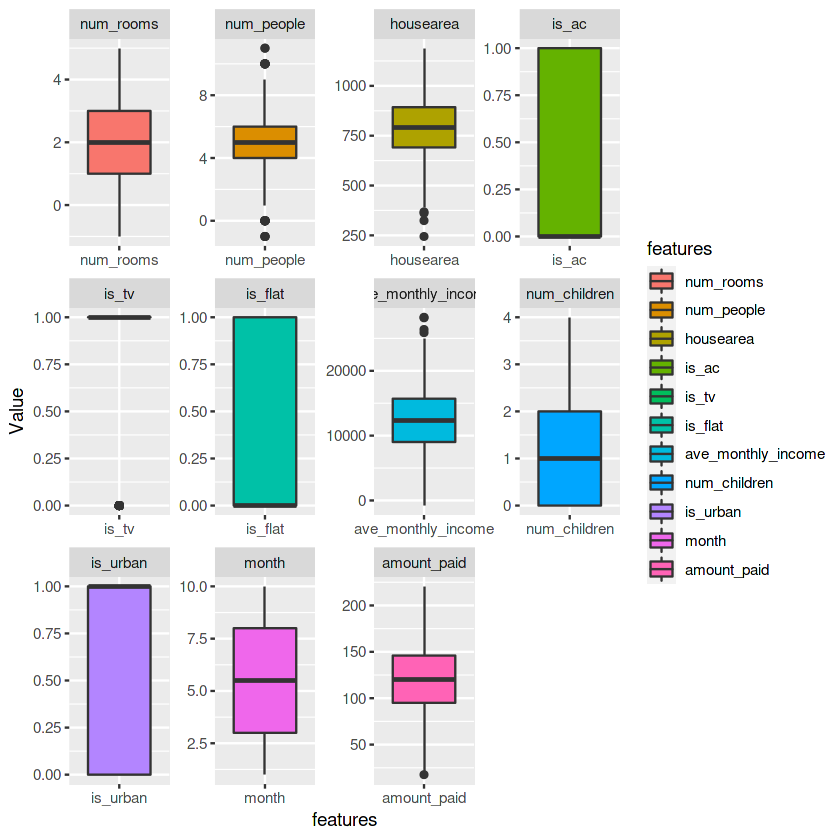

In [23]:
ggplot(df.melt, aes(x = features, y = Value))+
  geom_boxplot(aes(fill = features))+
  facet_wrap(~features, scales = "free")+
  theme(axis.text.x = element_text(hjust = 0.5))

**Observation**

* Only attributes `is_tv`, `num_people`, `house_area`, `ave_monthly_income` show outlier
* Values for `is_urban`, `is_ac`, `is_flat` is almost 0
* Maximum value for `amount_paid` is approximately 280.

#### 2.2.2. Histogram

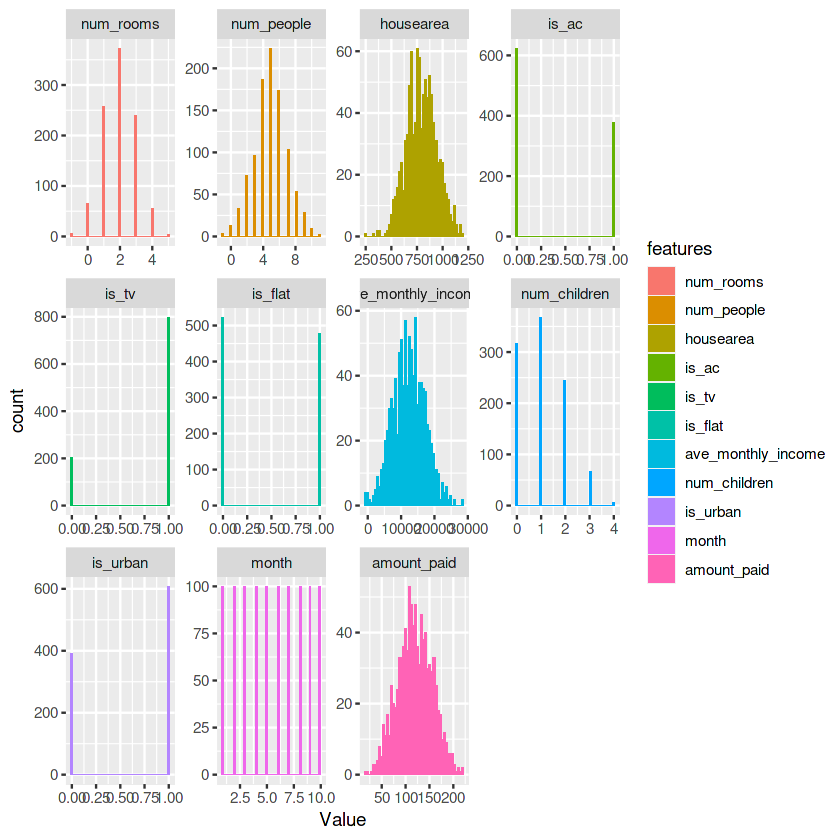

In [24]:
ggplot(df.melt, aes(Value))+
  geom_histogram(bins = 50, aes(fill = features))+
  facet_wrap(~features, nrow = 3, scales = "free")
#   theme(axis.text.x = element_text(hjust = 0.5))

**Observation**

* Almost no variable shows an acceptable normal distribution. They seeems to be highly skew.
* `amount_paid` distribution is quite the same as normal distribution.
* `is_urban` and `is_tv` show majority of value is 1, while `is_flat` and `is_ac` are 0
* number of children have 5 value
* because data seems very good for starting training therefore, we don't need to scale data

### 2.3. Correlation

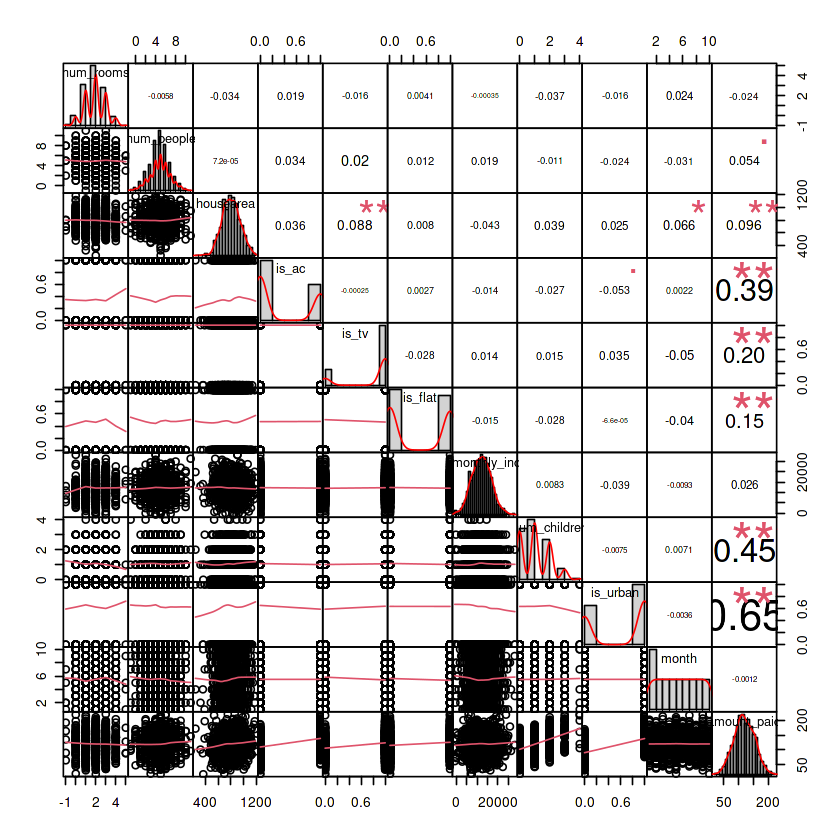

In [25]:
chart.Correlation(df, histogram = TRUE, method = "pearson")

In addition. `levelplot` can be used to plot correlation values in a heatmap format, while highlighting cells based on the value of correlation values are shown by blue color

Level plot

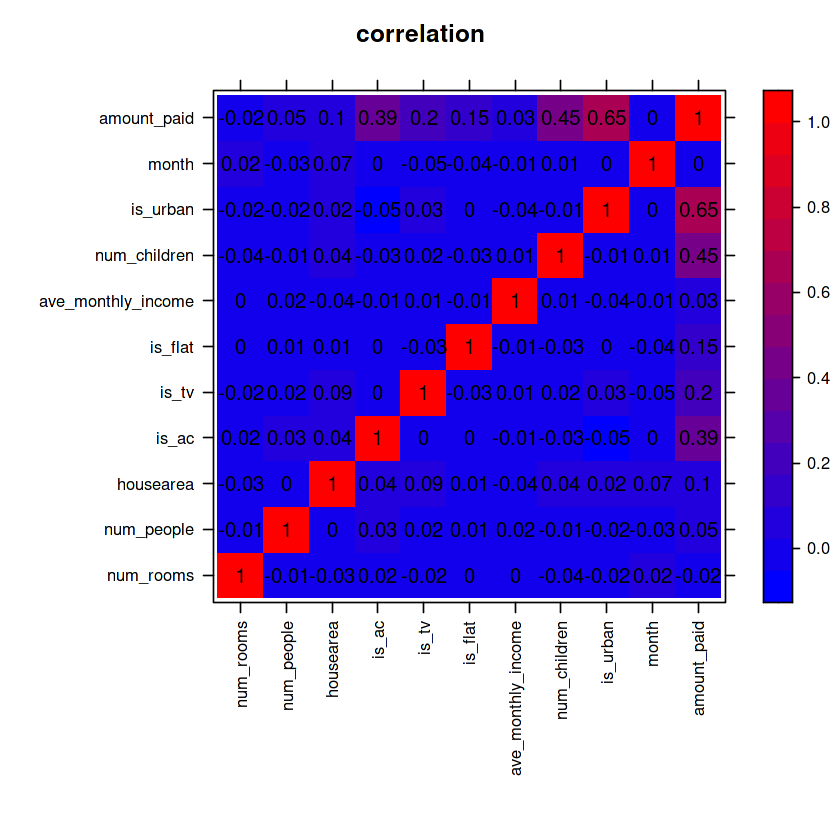

In [26]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("blue","red"))
#Plot the correlation matrix.
levelplot(cor(df), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

**Observation**

* amount_paid shows strong correlation with only is loan. almost strong or moderate strong correlations always correlate with amount_paid except `num_rooms` is negative and `month` is 0
* almost predictions show negative correlations or very low positive with each other.
* correlation values too many value equal zero, no relationship


**Compare with Some strong and moderate strong relationship**

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



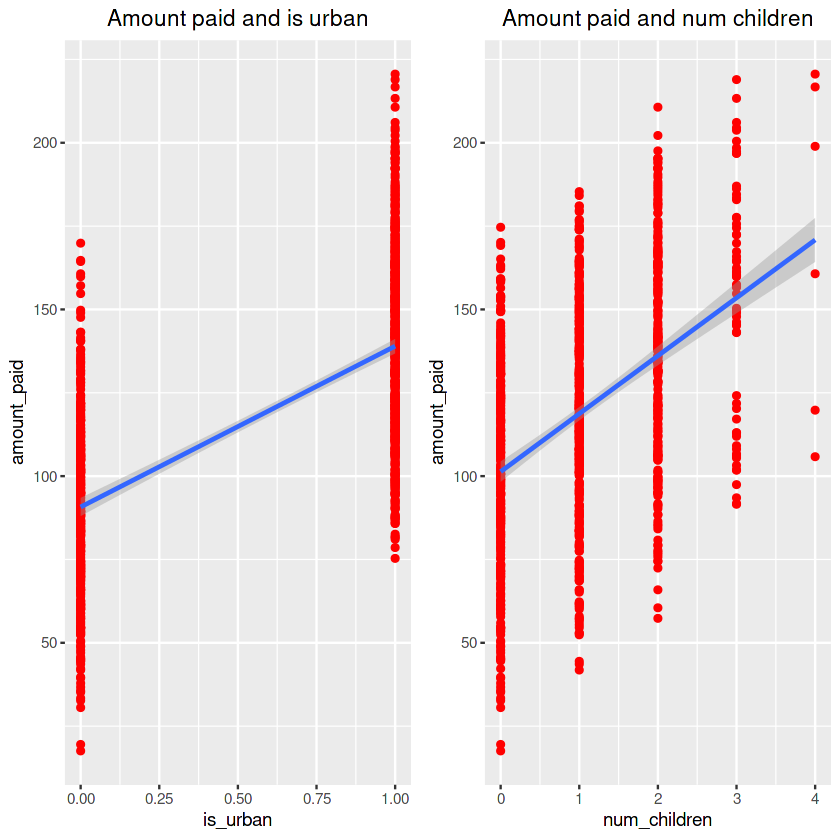

In [27]:
fig1 <- ggplot(df, aes(x = is_urban ,y = amount_paid)) + 
geom_point(color = "red") + 
geom_smooth(method = lm)+
theme(plot.title = element_text(hjust = 0.5))+
ggtitle("Amount paid and is urban")


fig2 <- ggplot(df, aes(x =num_children, y = amount_paid)) + 
geom_point(color = "red") + 
geom_smooth(method = lm) +
theme(plot.title = element_text(hjust = 0.5))+
ggtitle("Amount paid and num children")
grid.arrange(fig1, fig2, ncol = 2)


* Overall, the relationship between Amount paid and urban is stronger than amount paid and num children


### 2.4. EDA Summary

In this section, EDA was conducted on the dataset related to the amount of paid of each family. EDA covered various correlations. The EDA results can be summarised as follows:

* There are 1000 entries in the data set with no null values. In addition, it has 11 characteristics and 1 target variable.
* We observe some negative values in various aspects after performing some statistical and correlation analysis.
* Boxplot and histogram distribution analysis revealed a fairly normal distribution for several characteristics such as 'amount paid,' 'housearea,' and 'ave monthly income,'... Several columns have a consistent distribution. Furthermore, several of the features appear to contain outliers.
* Last but not least, the association between variables is not strong, but with a large number of attributes following normal and uniform distributions, we may consider building a linear model to be the best alternative, as will be demonstrated in the following sections.

In the next section, methodology of modelling is explained

## 3. Methodology<a class="anchor" id="sec_4"></a>

A thorough EDA was performed in the part prior. Methodology for the next parts is presented in this section ( which are prediction and inference statistic). Finally, a number of practical custom functions are provided for visualising and evaluating findings.

### 3.1. Modelling Methods

Building models that can forecast the most useful value given the available predictors is the goal of the prediction task. On the other hand, we look for traits that have a significant influence on prediction. Therefore, the aim is essentially to analyse the connection between predictors and the response variable. Various machine learning techniques, such as regression approaches, may be used to predict features.

Here, For prediction task, three groups methods are selected and 7 models are built. These group of models are

* Multiple linear regresion methods
* Other methods such as decision tree, gradient boosting and random forest

More research and tunning parameters have been done to make sure the model is appropriate for the description task.



### 3.2. Data preparation

We have 1000 observation. In order to be able to train and test models, the original dataset is split two parts. Train is 80% and test is 20%

In [28]:
train_ind <- 1:800

train <- df[train_ind,]
test <- df[-train_ind,]

train <- train[train$num_rooms >=0 & train$num_people >= 0 & train$ave_monthly_income >= 0,]
test <- test[test$num_rooms >=0 & test$num_people >= 0 & test$ave_monthly_income >= 0,]


cat(paste("train size is", nrow(train), "\n"))
cat(paste("test size is", nrow(test)))

# train <- train[train['num_rooms'] >=0 & train['num_people'] > 0 & train['ave_monthly_income'] >= 0,]

train size is 786 
test size is 199

### 3.3. Custom analysis function

The Metrics we use in this sections is very common, $MSE$, $RMSE$, $R^2$

\begin{array}
    MMSE = \frac{1}{n}\sum_{i=1}^{n}(x_i-y_i)^2
\end{array}

\begin{array}
    RRMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-y_i)^2}
\end{array}

\begin{array}
    RR^2 = 1 - \frac{RSS}{TSS}
\end{array}

Error function

In [29]:
library(Metrics)
get_error <- function(true_val, predict){
    df <- data.frame()
#     rmse <- rmse(true_val, predict)
    rmse <- sqrt(mean((true_val - predict)^2))
#     MSE <- mse(true_val, predict)
    
    MSE <- mean((true_val - predict)^2)
    
    rss <- sum((predict - true_val) ^ 2)  ## residual sum of squares
    tss <- sum((predict - mean(true_val)) ^ 2)  ## total sum of squares
    rsq <- 1 - rss/tss
    
    df[1, 'rmse'] <- rmse
    df[1, 'mse'] <- MSE
    df[1, 'r_square'] <- rsq
    
    return (df)
}

In [30]:
plot_act_pred = function(data1, data2, true_val, predict, start = 0.0, end = 1.2){
    plot1 <- ggplot(data=data1, aes(x=eval(parse(text = act)), y = eval(parse(text = predict))))
}

**Residuals plot use for linear regression**

In [31]:
plot_residuals <- function(model, bins, train){
    residuals_hist <- ggplot(data = train, aes(x = model$residuals)) +
        geom_histogram(bins = bins, fill = 'steelblue', color = 'black') +
        labs(title = 'Histogram of Residuals', x = 'Residuals', y = 'Frequency') +
        theme(plot.title = element_text(hjust = 0.5))
    
    
    print(residuals_hist)
    plot_color = "steelblue"


    par(mfcol=c(2,2))
    plot(model, col = plot_color)
}
    
        

In [32]:
plot_train_test <- function(df_train, df_test, column1, column2, intercep = 0, slope = 1){
    train_graph <- ggplot(data = df_train, aes(x = eval(parse(text = column1)), y = eval(parse(text =column2)))) + 
    geom_point(shape =21, alpha = 0.87, color = "black", fill = "red", size = 3) + 
    geom_abline(intercept = intercep, slope = slope, linetype="dashed")+
    xlab("True value") +
    ylab("Predict value") +
    ggtitle("Train") + 
    theme(plot.title = element_text(hjust = 0.5))

    test_graph <- ggplot(data = df_test, aes(x = eval(parse(text = "true_value")), y = eval(parse(text ="predict_value")))) + 
    geom_point(shape =21, alpha = 0.87, color = "black", fill = "red", size = 3) + 
    geom_abline(intercept = intercep, slope = slope, linetype="dashed") +
    xlab("True value") +
    ylab("Predict value") +
    ggtitle("Test") + 
    theme(plot.title = element_text(hjust = 0.5))
    
    print(train_graph)
    print(test_graph)
}

**Trends plot**

In [33]:
plot_trend <- function(train_pred, test_pred){

    df_train <- data.frame(cbind(train_pred, train$amount_paid))
    names(df_train) <- c("predict_value", "true_value")

    df_test <- data.frame(cbind(test_pred, test$amount_paid))
    names(df_test) <- c("predict_value", "true_value")

    plot_train_test(df_train, df_test, "true_value", "predict_value")
}

## 4. Model Development <a class="anchor" id="sec_5"></a>

### 4.1. Multiple linear regression

#### 4.1.1. Multiple linear regression with out subset

Multiple linear regression is a statistical approach that predicts the outcome of a dependent variable using two or more independent variables. This approach enables analysts to calculate the model's variation and the proportionate contribution of each independent variable to the total variance. Multiple regression may be classified into two types: linear regression and non-linear regression. But in this case, we will focus on linear model in regression


In [34]:
lr = lm(amount_paid ~ ., data = train)

In [35]:
summary(lr)


Call:
lm(formula = amount_paid ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.7416 -10.6600   0.0505   9.6692  25.4156 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.630e+01  3.403e+00   7.729 3.37e-14 ***
num_rooms          -2.046e-01  4.415e-01  -0.464 0.643128    
num_people          8.820e-01  2.264e-01   3.896 0.000106 ***
housearea           5.947e-03  3.042e-03   1.955 0.050974 .  
is_ac               3.331e+01  9.243e-01  36.039  < 2e-16 ***
is_tv               1.444e+01  1.126e+00  12.820  < 2e-16 ***
is_flat             1.163e+01  8.954e-01  12.988  < 2e-16 ***
ave_monthly_income  3.633e-04  9.553e-05   3.803 0.000154 ***
num_children        1.821e+01  4.872e-01  37.370  < 2e-16 ***
is_urban            5.010e+01  9.196e-01  54.476  < 2e-16 ***
month               2.182e-01  1.960e-01   1.113 0.265881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

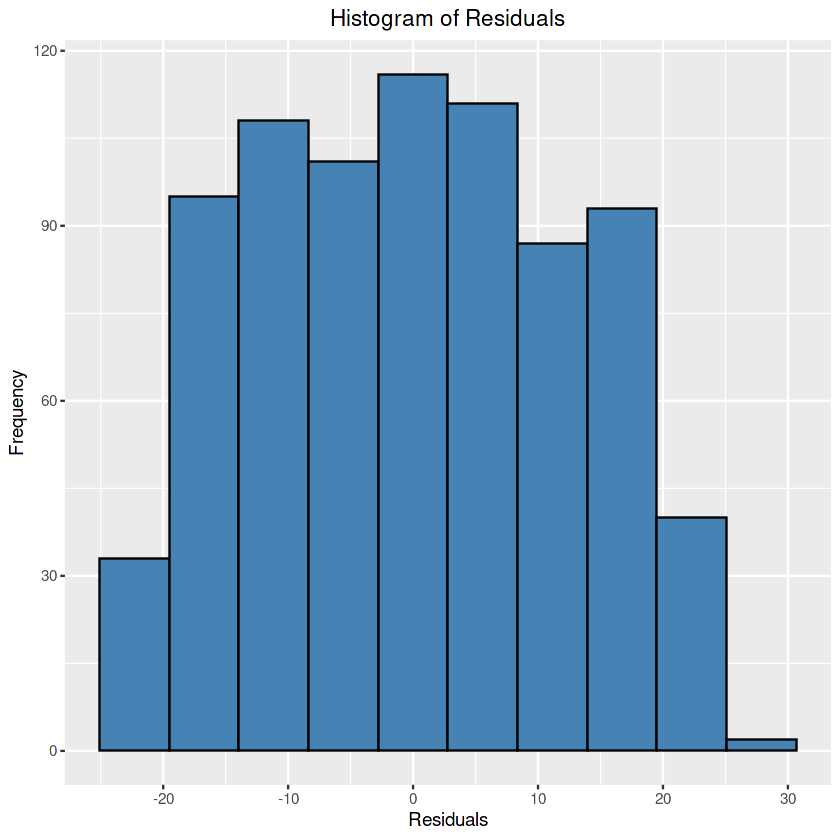

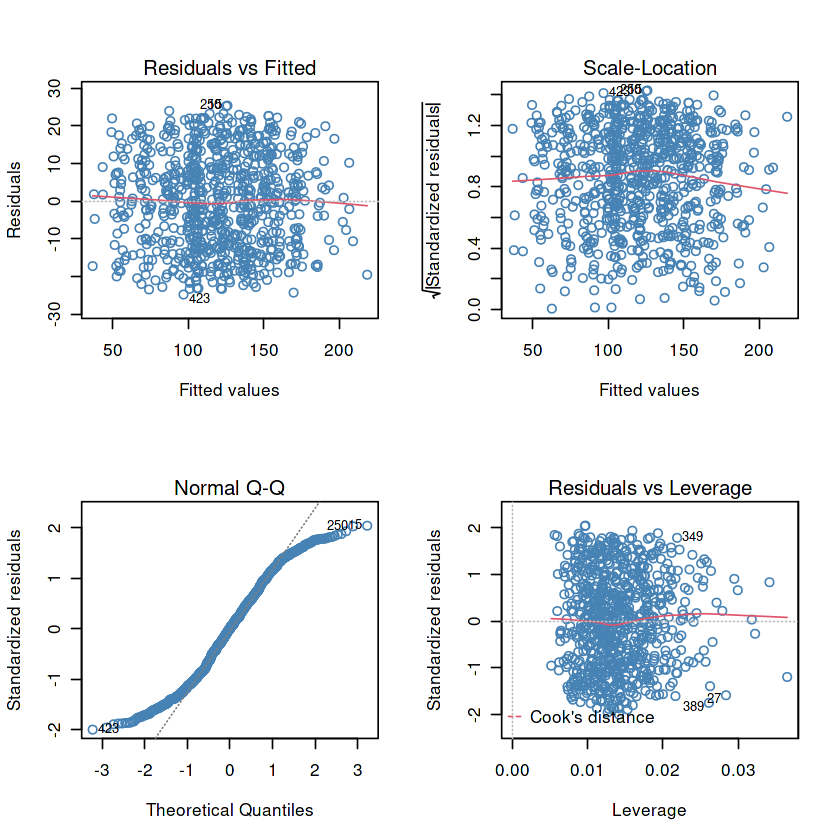

In [36]:
plot_residuals(lr, 10, train)

**Observations**

* The value $R^2$ and its adjusted is very good, which means the proportion of the variance for `amount_paid` that's explained by response variable in a regression model
* P-value for some predictors is large, means it not useful for this models.
* F-statistic is 576.3 and P-value: < 2.2e-16, which means the null hypothesis of modlel is rejected and explain that model is very useful as well.
* See histogram, we can see residuals is follow normal distribution, which mean models is good when the probability is nearby 0.

**Error score**

In [37]:
lr_error = get_error(test$amount_paid, predict(lr, test))
lr_error

rmse     mse      r_square 
1 13.14704 172.8446 0.8623449

**Plot trend of data**

Model is much good to fit the dataset, it very strong to fit the linear line.

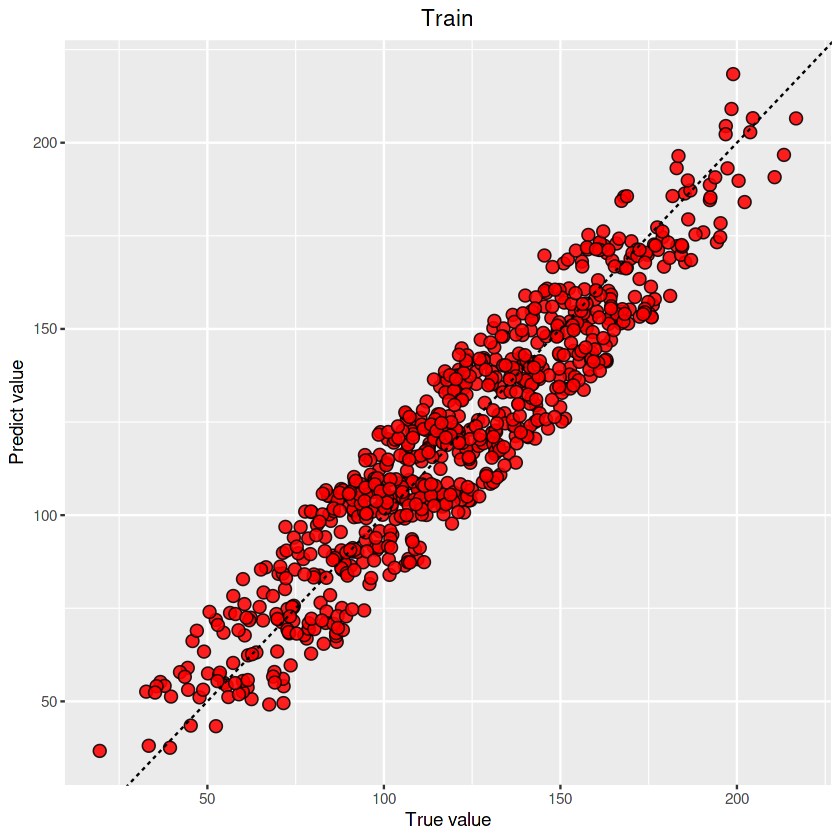

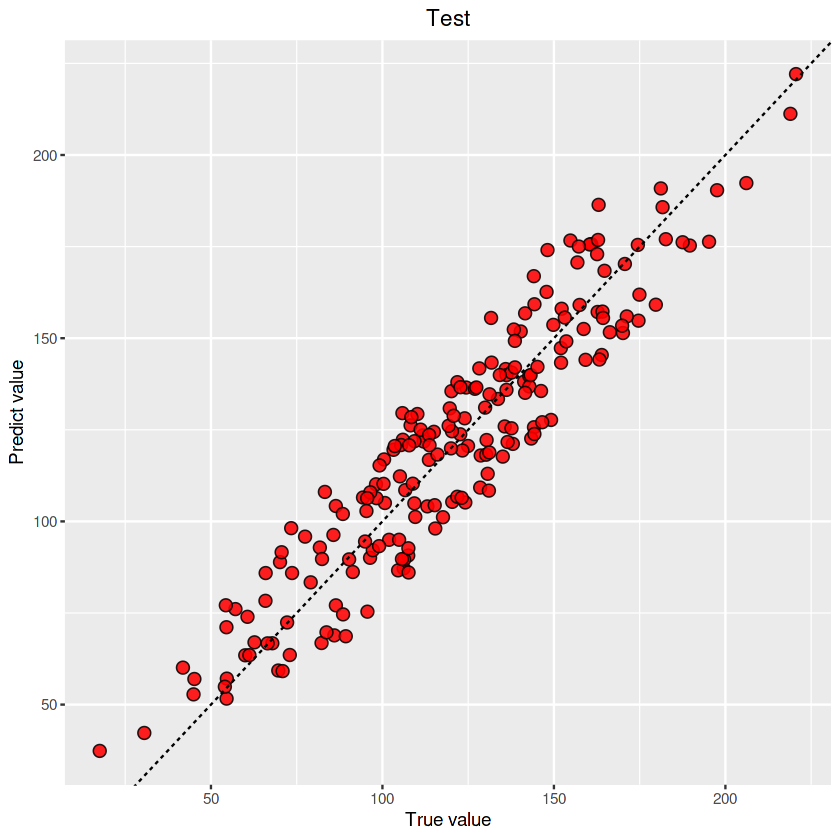

In [38]:
train_pred_lr <- predict(lr, train)
test_pred_lr <- predict(lr, test)
plot_trend(train_pred_lr, test_pred_lr)

#### 4.1.2. Multiple linear regression with subset

We should try to remove features `num_rooms` and `month` because they has P-value higher than significant values alpha =  0.05

In [39]:
subset_lr = lm(amount_paid~., data = subset(train, select=c( -num_rooms, -month )))

In [40]:
summary(subset_lr)


Call:
lm(formula = amount_paid ~ ., data = subset(train, select = c(-num_rooms, 
    -month)))

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3442 -10.5299   0.2203   9.8015  24.6585 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.674e+01  3.145e+00   8.502  < 2e-16 ***
num_people         8.758e-01  2.260e-01   3.875 0.000116 ***
housearea          6.249e-03  3.031e-03   2.062 0.039525 *  
is_ac              3.330e+01  9.233e-01  36.060  < 2e-16 ***
is_tv              1.435e+01  1.122e+00  12.795  < 2e-16 ***
is_flat            1.159e+01  8.939e-01  12.966  < 2e-16 ***
ave_monthly_income 3.635e-04  9.543e-05   3.809 0.000151 ***
num_children       1.822e+01  4.863e-01  37.468  < 2e-16 ***
is_urban           5.011e+01  9.192e-01  54.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.49 on 777 degrees of freedom
Multiple R-squared:  0.8812,	Adjusted R-squared:  

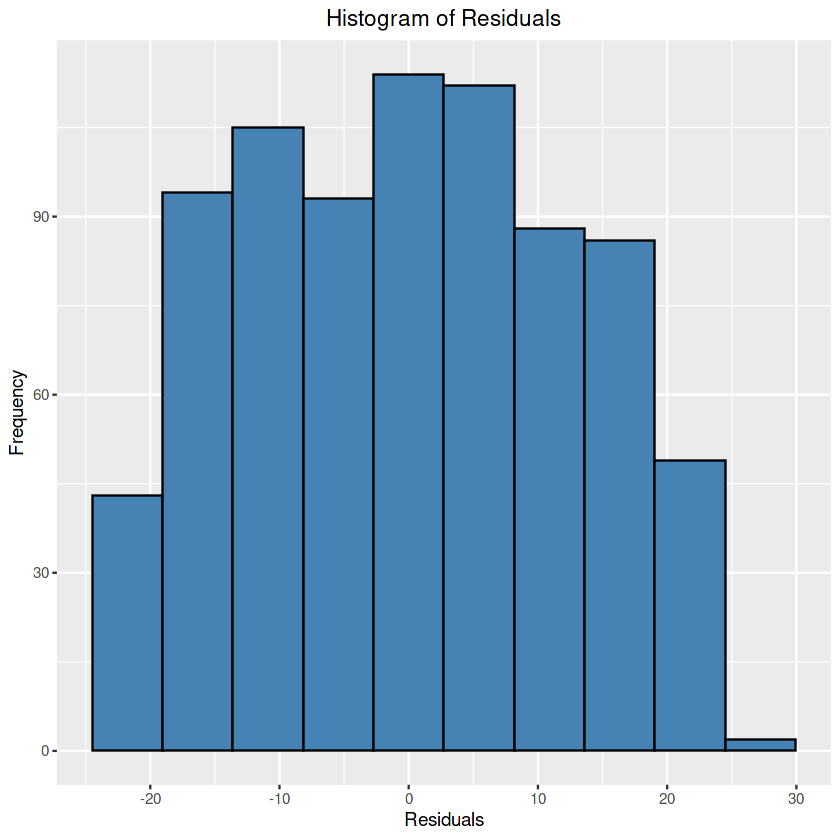

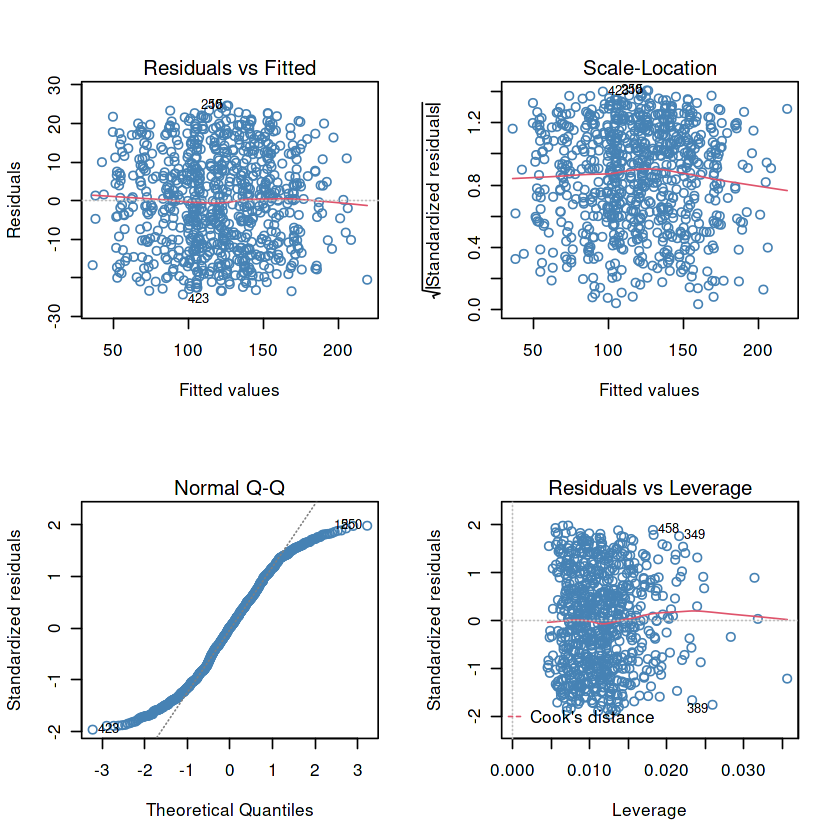

In [41]:
plot_residuals(subset_lr, 10, train)

**Observations**

* The value $R^2$ and its adjusted is very good, which means the proportion of the variance for `amount_paid` that's explained by response variable in a regression model
* P-value for some predictors is large, means it not useful for this models.
* F-statistic is 576.3 and P-value: < 2.2e-16, which means the null hypothesis of modlel is rejected and explain that model is very useful as well.
* See histogram, we can see residuals is follow normal distribution, which mean models is good when the probability is nearby 0.

In [42]:
subset_lr_error = get_error(test$amount_paid,predict(subset_lr, test))
subset_lr_error

rmse    mse      r_square 
1 13.1182 172.0871 0.8628825

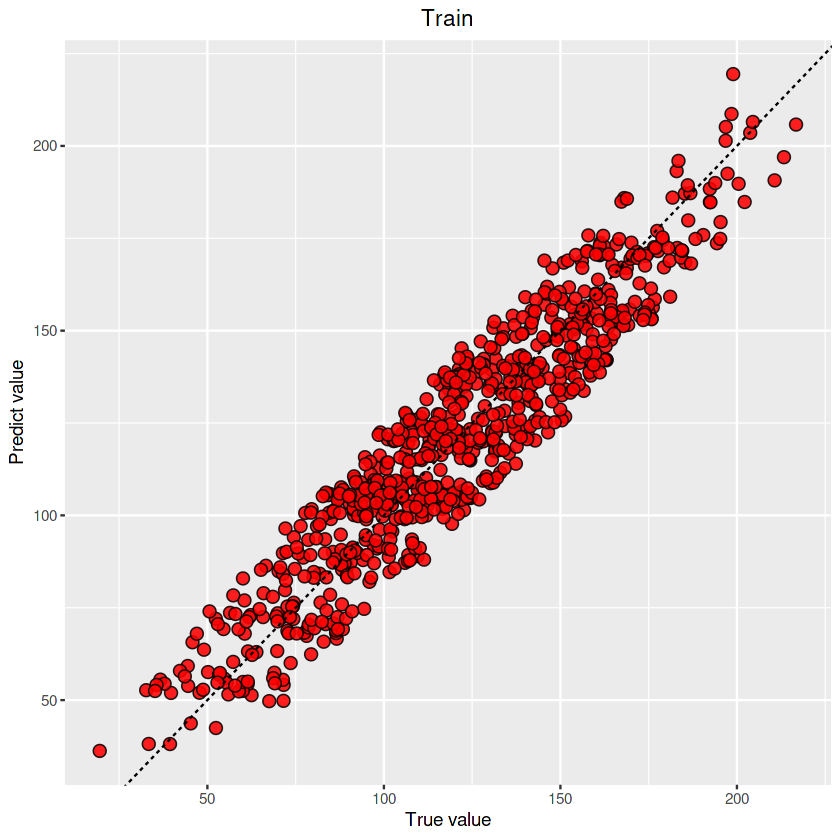

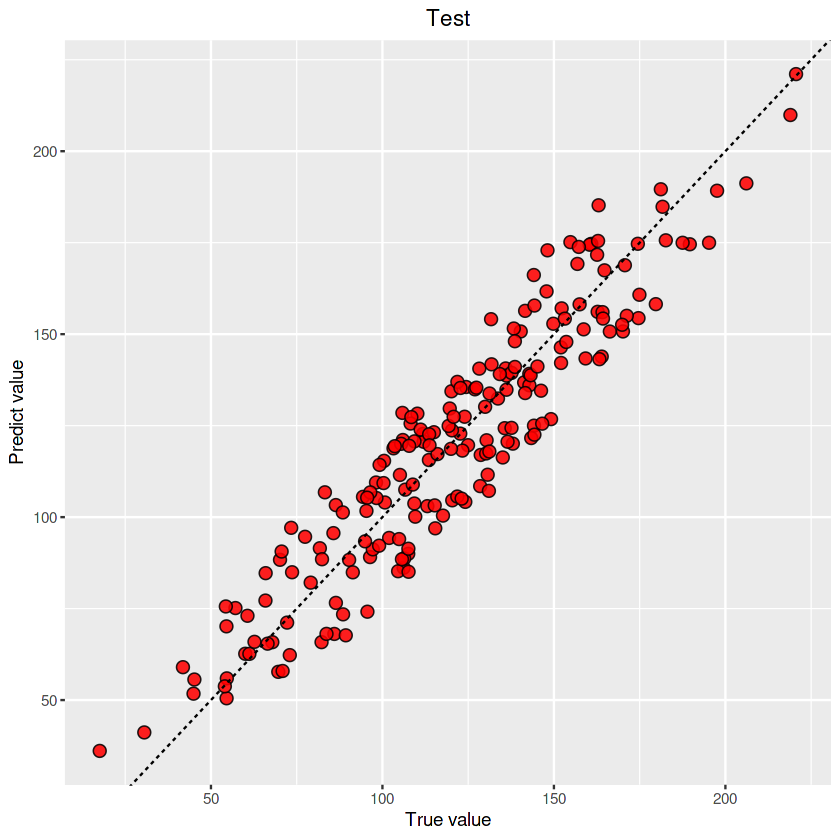

In [43]:
train_pred_subset_lr <- predict(subset_lr, train)
test_pred_subset_lr <- predict(subset_lr, test)
plot_trend(train_pred_subset_lr, test_pred_subset_lr)

#### 4.1.3. Multiple linear regression with no outlier

In [44]:
df_outlier <- train
for (x in 1:ncol(df))
{
  value = train[,x][train[,x] %in% boxplot.stats(train[,x])$out]
  df_outlier[,x][df_outlier[,x] %in% value] = NA
} 

as.data.frame(colSums(is.na(df_outlier)))
           colSums(is.na(df_outlier))

df_no_outlier = drop_na(df_outlier)

colSums(is.na(df_outlier))
num_rooms            0                       
num_people          16                       
housearea            7                       
is_ac                0                       
is_tv              157                       
is_flat              0                       
ave_monthly_income   3                       
num_children         0                       
is_urban             0                       
month                0                       
amount_paid          0

num_rooms         num_people          housearea              is_ac 
                 0                 16                  7                  0 
             is_tv            is_flat ave_monthly_income       num_children 
               157                  0                  3                  0 
          is_urban              month        amount_paid 
                 0                  0                  0

In [45]:
lr_out <- lm(amount_paid~., df_no_outlier)

In [46]:
summary(lr_out)


Call:
lm(formula = amount_paid ~ ., data = df_no_outlier)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.6832 -10.7625   0.2183   9.4295  24.5708 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.766e+01  3.868e+00   9.736  < 2e-16 ***
num_rooms          3.805e-02  5.091e-01   0.075    0.940    
num_people         1.097e+00  2.711e-01   4.047 5.86e-05 ***
housearea          5.358e-03  3.570e-03   1.501    0.134    
is_ac              3.346e+01  1.049e+00  31.907  < 2e-16 ***
is_tv                     NA         NA      NA       NA    
is_flat            1.116e+01  1.015e+00  10.997  < 2e-16 ***
ave_monthly_income 4.789e-04  1.114e-04   4.299 2.00e-05 ***
num_children       1.840e+01  5.481e-01  33.570  < 2e-16 ***
is_urban           5.052e+01  1.046e+00  48.294  < 2e-16 ***
month              2.590e-01  2.232e-01   1.160    0.246    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

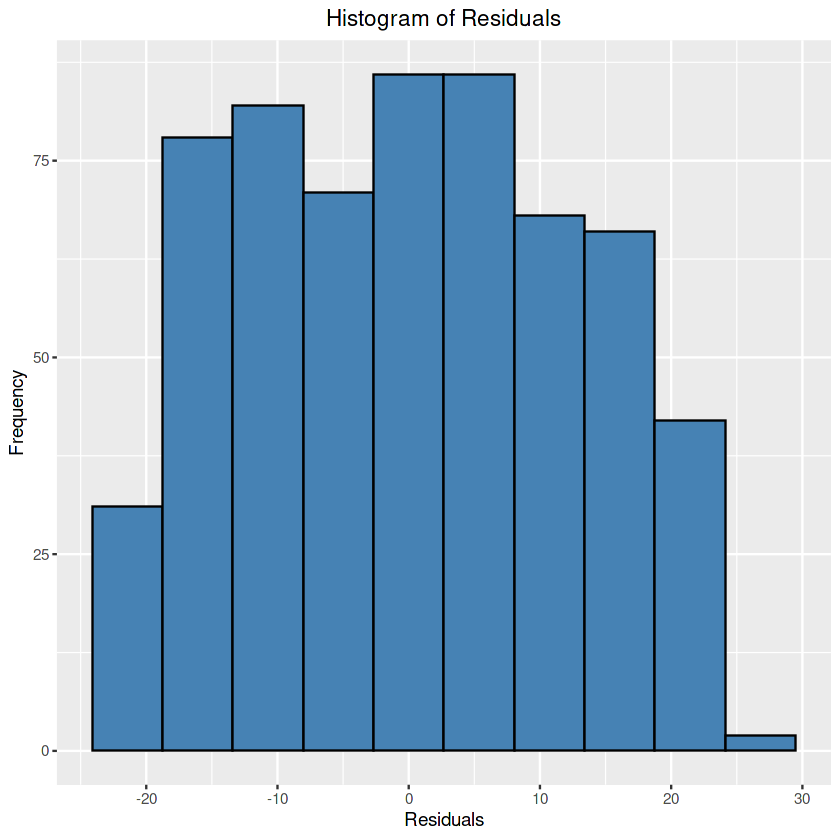

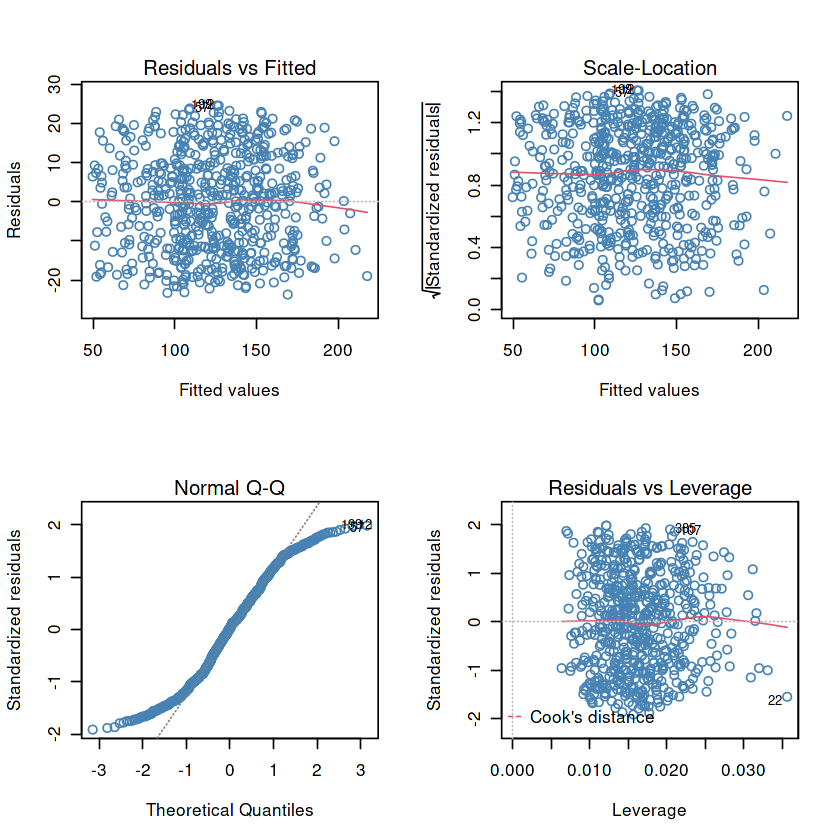

In [47]:
plot_residuals(lr_out, 10, df_no_outlier)

**Observations**

* The value $R^2$ and its adjusted is very good, which means the proportion of the variance for `amount_paid` that's explained by response variable in a regression model
* P-value for some predictors is large, means it not useful for this models.
* F-statistic is 576.3 and P-value: < 2.2e-16, which means the null hypothesis of modlel is rejected and explain that model is very useful as well.
* See histogram, we can see residuals is follow normal distribution, which mean models is good when the probability is nearby 0.

In [48]:
lr_out_error = get_error(test$amount_paid, predict(lr_out, test))
lr_out_error

Warning message in predict.lm(lr_out, test):
“prediction from a rank-deficient fit may be misleading”


rmse     mse      r_square
1 15.47163 239.3714 0.806116

Warning message in predict.lm(lr_out, train):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(lr_out, test):
“prediction from a rank-deficient fit may be misleading”


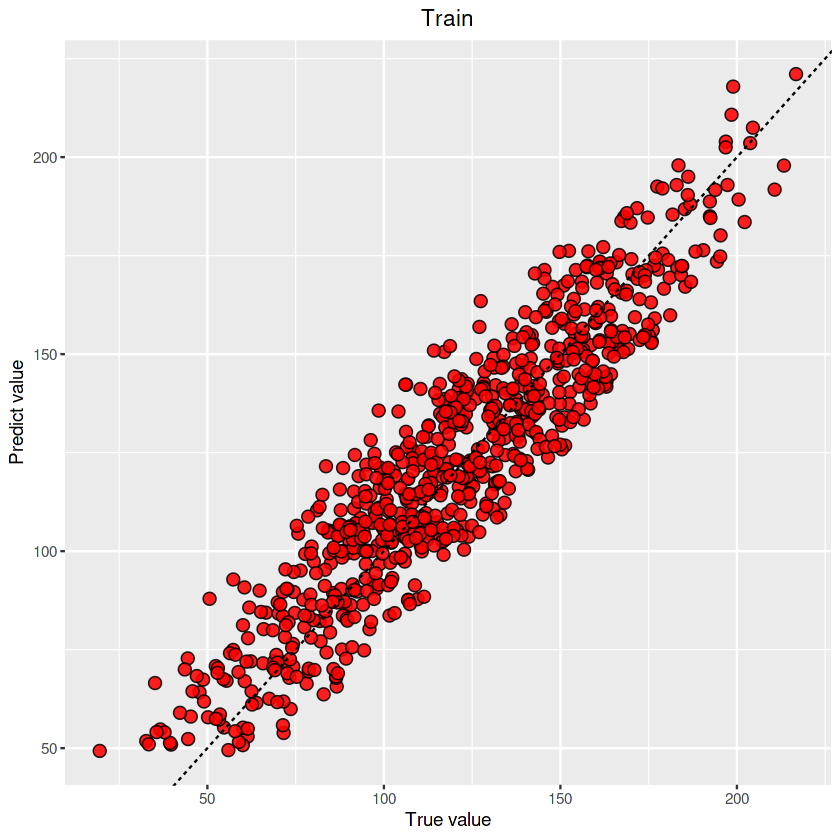

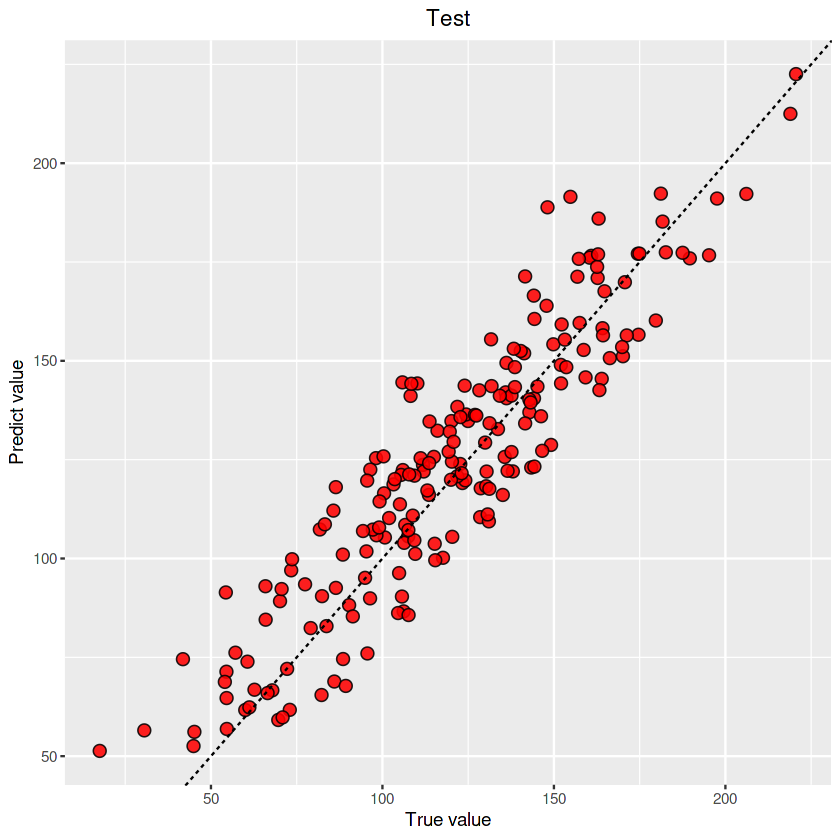

In [49]:
train_pred_out <- predict(lr_out, train)
test_pred_out <- predict(lr_out, test)

plot_trend(train_pred_out, test_pred_out)

#### 4.1.4. Multiple linear regression using step() function

In [50]:
step1 <- step(lr)

Start:  AIC=3980.76
amount_paid ~ num_rooms + num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban + 
    month

                     Df Sum of Sq    RSS    AIC
- num_rooms           1        34 121033 3979.0
- month               1       194 121193 3980.0
<none>                            121000 3980.8
- housearea           1       597 121596 3982.6
- ave_monthly_income  1      2258 123257 3993.3
- num_people          1      2370 123370 3994.0
- is_tv               1     25659 146659 4129.9
- is_flat             1     26338 147338 4133.6
- is_ac               1    202778 323778 4752.4
- num_children        1    218038 339037 4788.6
- is_urban            1    463335 584335 5216.5

Step:  AIC=3978.98
amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + 
    ave_monthly_income + num_children + is_urban + month

                     Df Sum of Sq    RSS    AIC
- month               1       190 121224 3978.2
<none>                 

In [51]:
summary(step1)


Call:
lm(formula = amount_paid ~ num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3442 -10.5299   0.2203   9.8015  24.6585 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.674e+01  3.145e+00   8.502  < 2e-16 ***
num_people         8.758e-01  2.260e-01   3.875 0.000116 ***
housearea          6.249e-03  3.031e-03   2.062 0.039525 *  
is_ac              3.330e+01  9.233e-01  36.060  < 2e-16 ***
is_tv              1.435e+01  1.122e+00  12.795  < 2e-16 ***
is_flat            1.159e+01  8.939e-01  12.966  < 2e-16 ***
ave_monthly_income 3.635e-04  9.543e-05   3.809 0.000151 ***
num_children       1.822e+01  4.863e-01  37.468  < 2e-16 ***
is_urban           5.011e+01  9.192e-01  54.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.49 on 777 degrees of free

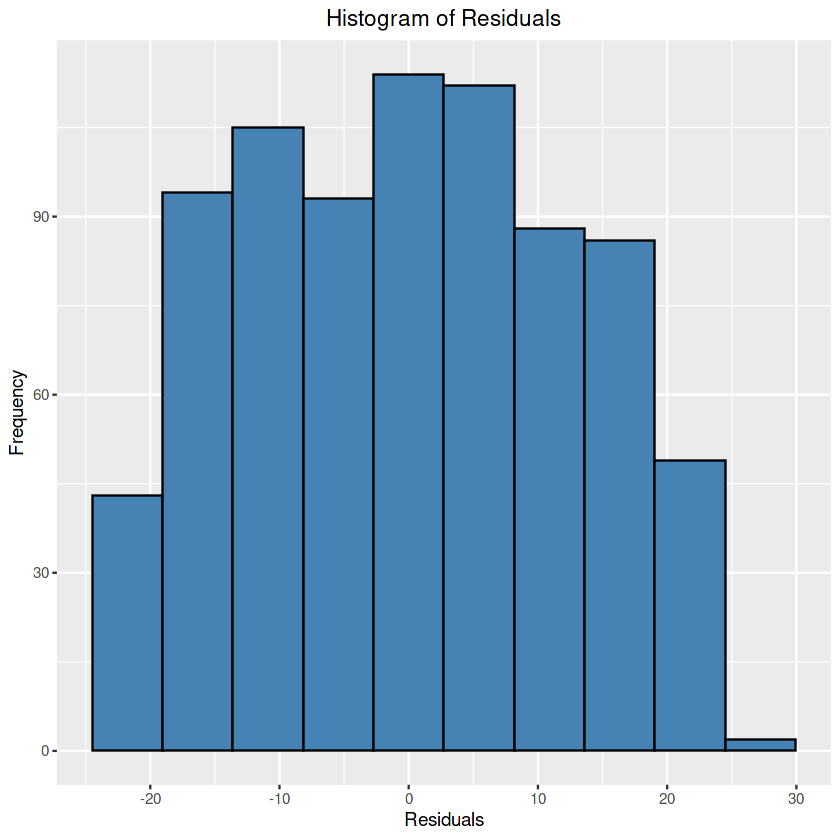

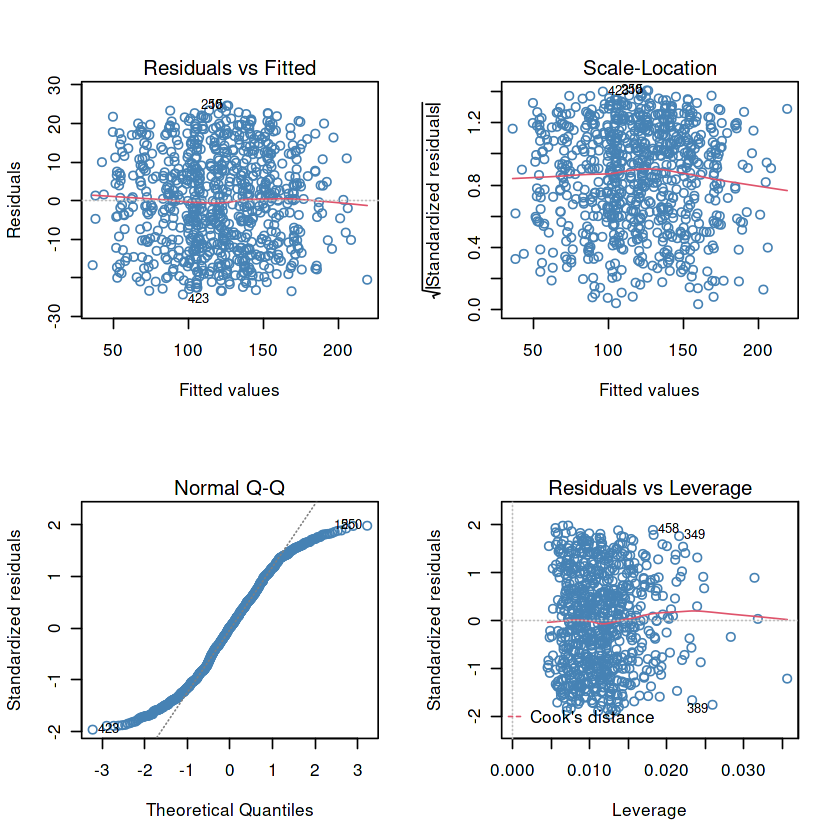

In [52]:
plot_residuals(step1, 10, train)

**Observations**

* The value $R^2$ and its adjusted is very good, which means the proportion of the variance for `amount_paid` that's explained by response variable in a regression model
* P-value for some predictors is large, means it not useful for this models.
* F-statistic is 720.7 and P-value: < 2.2e-16, which means the null hypothesis of modlel is rejected and explain that model is very useful as well.
* See histogram, we can see residuals is follow normal distribution, which mean models is good when the probability is nearby 0.

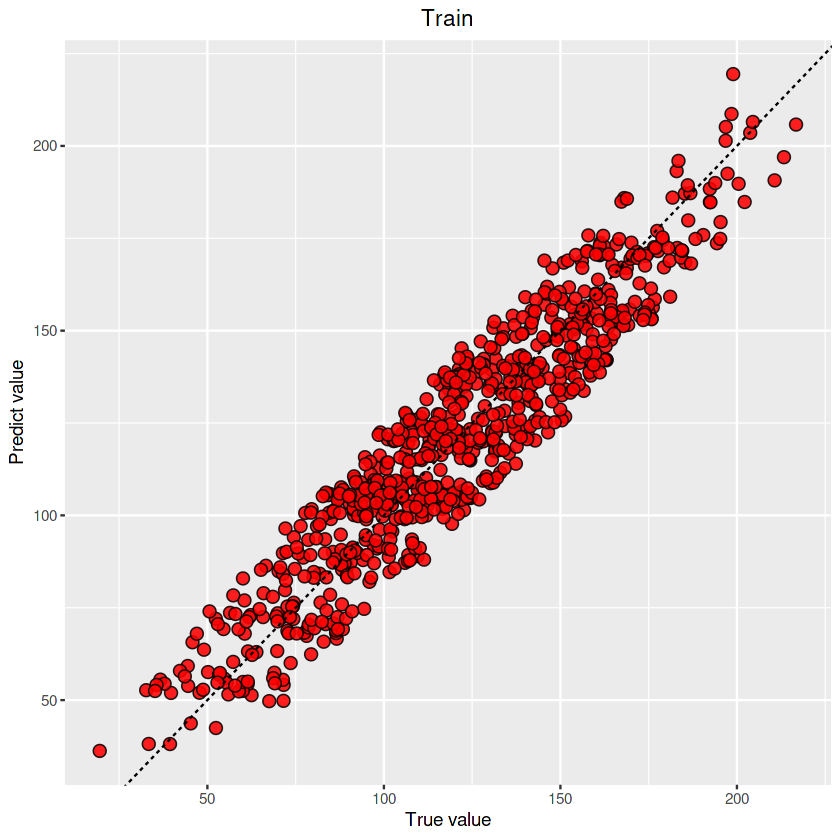

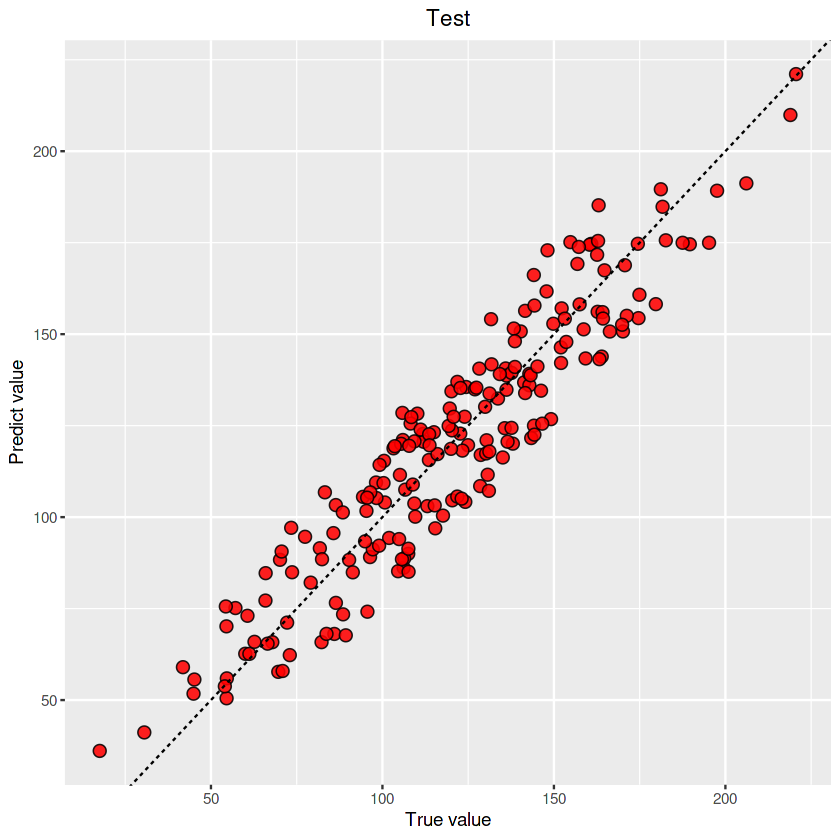

In [53]:
train_pred_step <- predict(step1, train)
test_pred_step <- predict(step1, test)
plot_trend(train_pred_step, test_pred_step)

In [54]:
step_error = get_error(test$amount_paid,predict(step1, test))
step_error

rmse    mse      r_square 
1 13.1182 172.0871 0.8628825

### 4.1.5. Multiple linear regression with penalty

### 4.1.5.1 Ridge regression

In [55]:

train.mat = model.matrix(amount_paid~., train)[,-1] # trim off the first column
                                         # leaving only the predictors
test.mat <- model.matrix(amount_paid ~ ., data = test)[,-1]

Now, we generate a list of lambda values that will be used in cross-validation.

In [56]:
grid <- seq(10, 0, by = -0.01)

With the generated list of possible lambda values, we can now fit the ridge model with the `cv.glmnet` function

In [57]:
set.seed(1)
fit.ridge <- glmnet(train.mat, train$amount_paid, alpha = 0, lambda = grid)
ridge_reg <- cv.glmnet(train.mat, train$amount_paid, alpha = 0, lambda = grid, nfolds = 10)
bestlam.ridge <- ridge_reg$lambda.min
cat("The best score of lambda is", bestlam.ridge)
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)

The best score of lambda is 0.12

In [58]:
ridge_error = get_error(test$amount_paid, as.vector(pred.ridge[,1]))
ridge_error

rmse     mse      r_square 
1 13.13889 172.6304 0.8615464

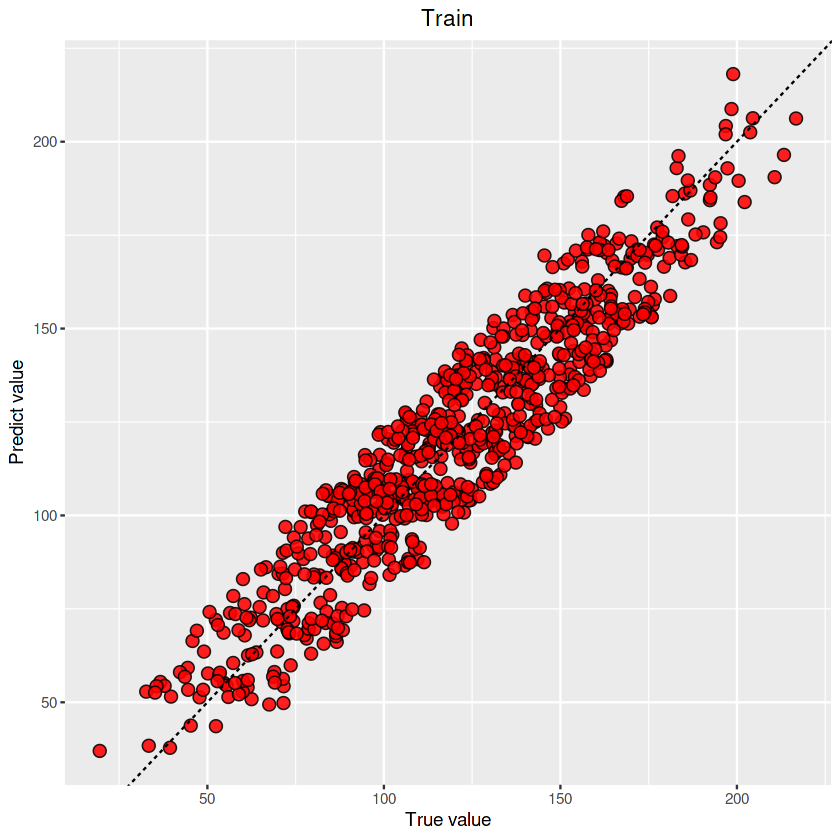

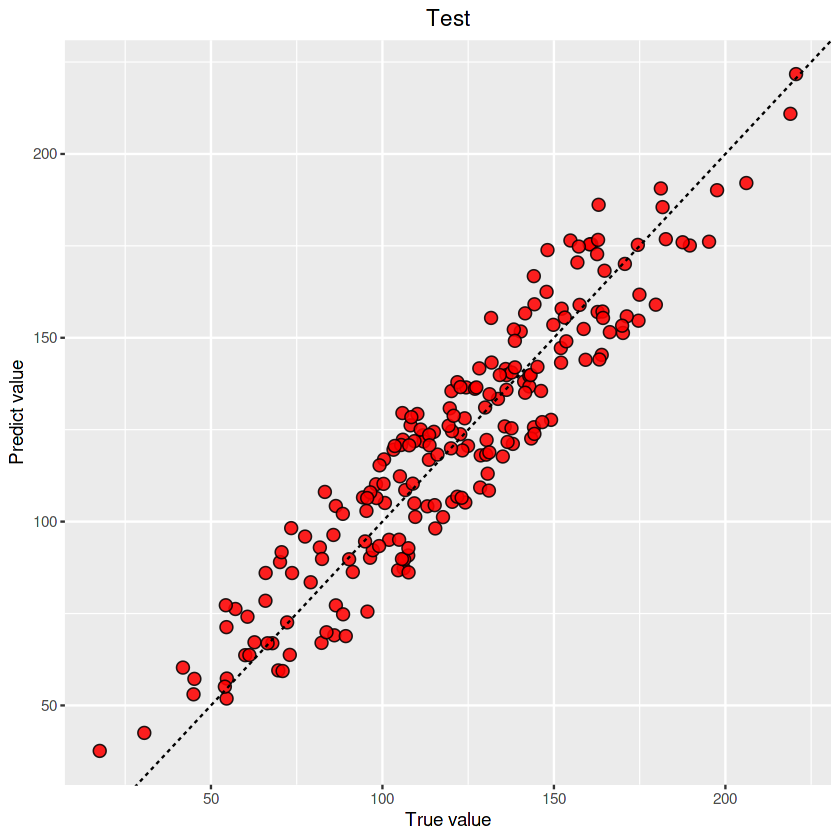

In [59]:
pred.ridge.test <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
pred.ridge.train <- predict(fit.ridge, s = bestlam.ridge, newx = train.mat)

plot_trend(pred.ridge.train, pred.ridge.test)

**Observations**

* The value $R^2$ is not higher than linear regression, which means model is penalty too much.
* See trends, we can see residuals is follow normal distribution, which mean models is good when the probability is nearby 0.

### 4.1.5.2 Lasso regression

With the generated list of possible lambda values and set alpha is 1, we can now fit the ridge model with the `cv.glmnet` function

In [60]:
set.seed(1)
fit.lasso <- glmnet(train.mat, train$amount_paid, alpha = 1, lambda = grid)
cv.lasso <- cv.glmnet(train.mat, train$amount_paid, alpha = 1, lambda = grid, nfolds = 10)
bestlam.lasso <- cv.lasso$lambda.min
cat("The best score of lambda is", bestlam.lasso)

pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)


The best score of lambda is 0.01

In [61]:
lasso_error = get_error(test$amount_paid, pred.lasso[,1])
lasso_error

rmse    mse      r_square 
1 13.1463 172.8253 0.8621748

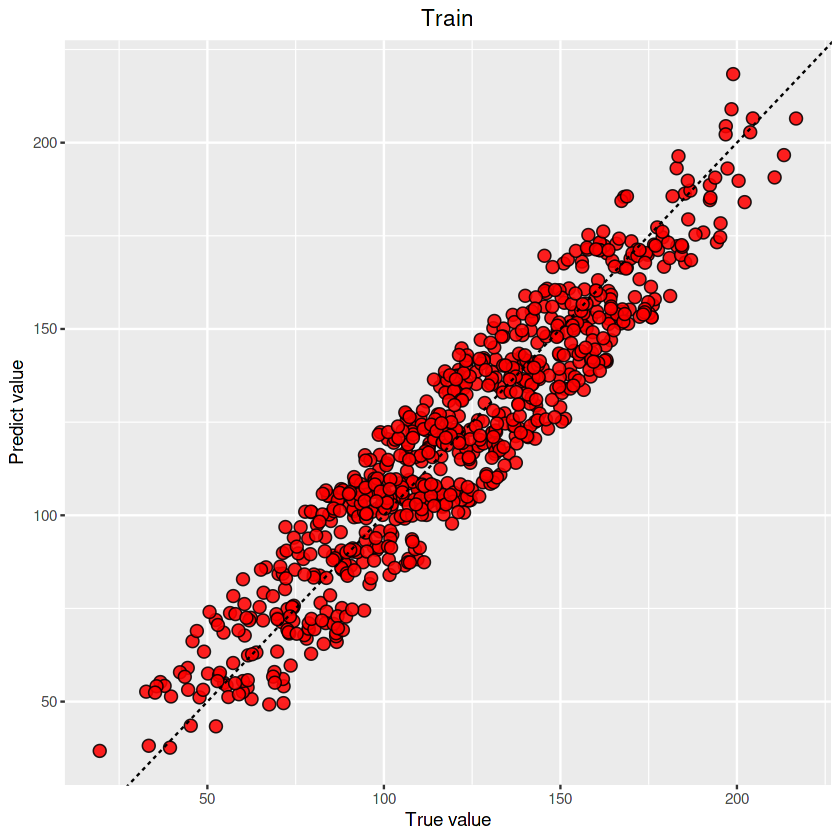

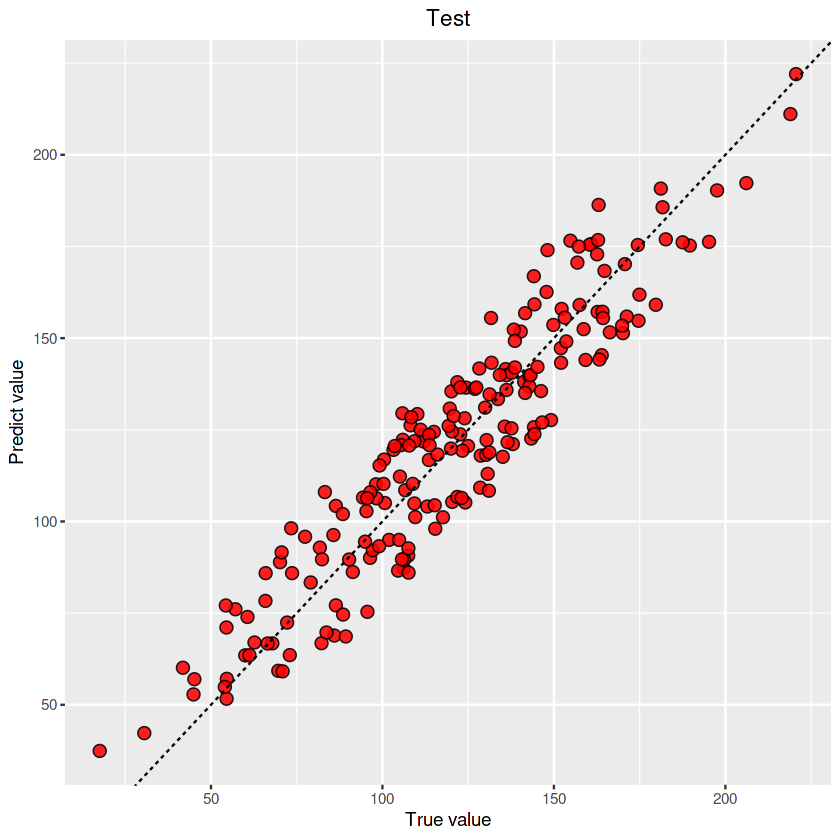

In [62]:
pred.lasso.train <- predict(fit.lasso, s = bestlam.lasso, newx = train.mat)
pred.lasso.test <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)

plot_trend(pred.lasso.train, pred.lasso.test)

**Observations**

* The value $R^2$ is not higher than linear regression, which means model is penalty too much.
* See trends, we can see residuals is follow normal distribution, which mean models is good when the probability is nearby 0.

## 4.2. Several optimize methods models

### 4.2.1. Decision Tree

Tree-based models in machine learning are a high-performance class. Machine learning models capable of high accuracy are represented by tree-based models, which are simply obvious and intelligible, making them particularly popular in the field of machine learning.

There are two major advantages of using tree-based models:

* Because they make no assumptions about the link between result and predictors, they support both linear and nonlinear relationships.

* They are highly interpretable in terms of the model's tree-based hierarchical representation.

In [63]:
tree_reg = rpart(amount_paid ~., train)
tree_reg

n= 786 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 786 1020752.00 120.09530  
   2) is_urban< 0.5 305  217800.80  90.77662  
     4) is_ac< 0.5 178   88426.85  78.22114  
       8) num_children< 1.5 117   35102.84  67.81113 *
       9) num_children>=1.5 61   16325.95  98.18790 *
     5) is_ac>=0.5 127   61985.86 108.37410  
      10) num_children< 1.5 95   25171.28 100.00480 *
      11) num_children>=1.5 32   10405.84 133.22020 *
   3) is_urban>=0.5 481  374535.30 138.68610  
     6) is_ac< 0.5 313  164457.00 126.82230  
      12) num_children< 1.5 216   71938.31 117.50930  
        24) num_children< 0.5 98   23081.98 107.14300 *
        25) num_children>=0.5 118   29579.27 126.11850 *
      13) num_children>=1.5 97   32067.13 147.56060 *
     7) is_ac>=0.5 168   83944.80 160.78960  
      14) num_children< 1.5 120   33524.30 151.02330  
        28) num_children< 0.5 55   11053.11 140.37510 *
        29) num_children>=0.5 65   10958.39 160.03330 *
      15

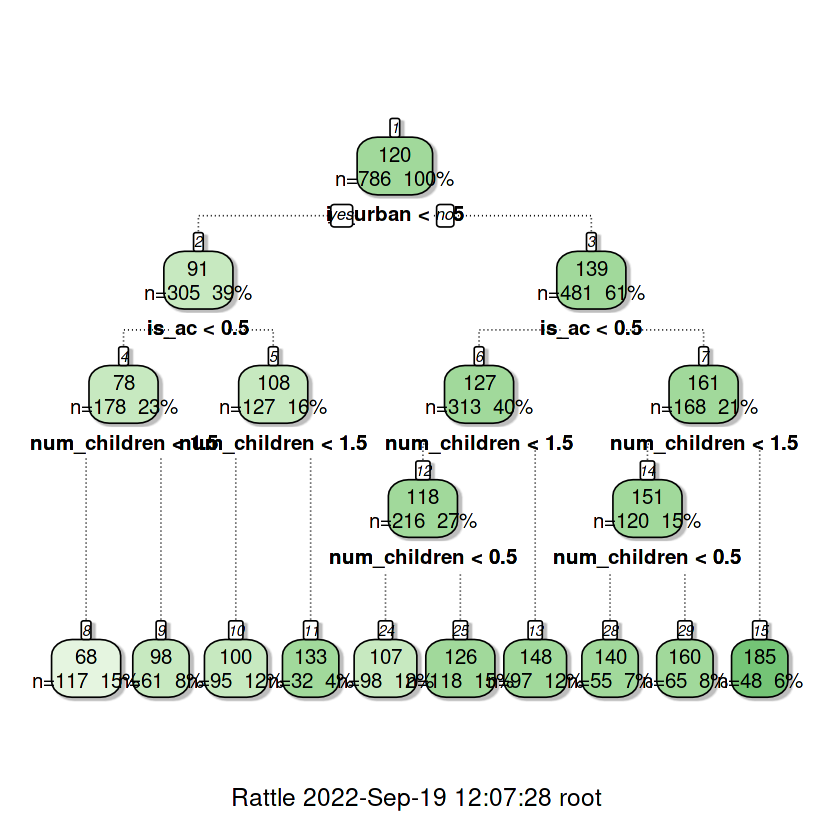

In [64]:
fancyRpartPlot(tree_reg)

In [65]:

df_imp_tree <- data.frame(imp = tree_reg$variable.importance)
df_imp_tree

imp        
is_urban           428415.8456
num_children       196209.4083
is_ac              193521.5469
num_people           8796.7784
ave_monthly_income   8238.9076
housearea            4315.7156
month                2364.0504
num_rooms            1770.3421
is_flat               209.3234

In [66]:
subset_tree <- rpart(amount_paid ~., subset(train, select = c(-is_tv)))

In [67]:
dt_pred <- predict(subset_tree, test)

In [68]:
tree_error = get_error(test$amount_paid, dt_pred)
tree_error

rmse     mse      r_square 
1 19.07531 363.8674 0.6829456

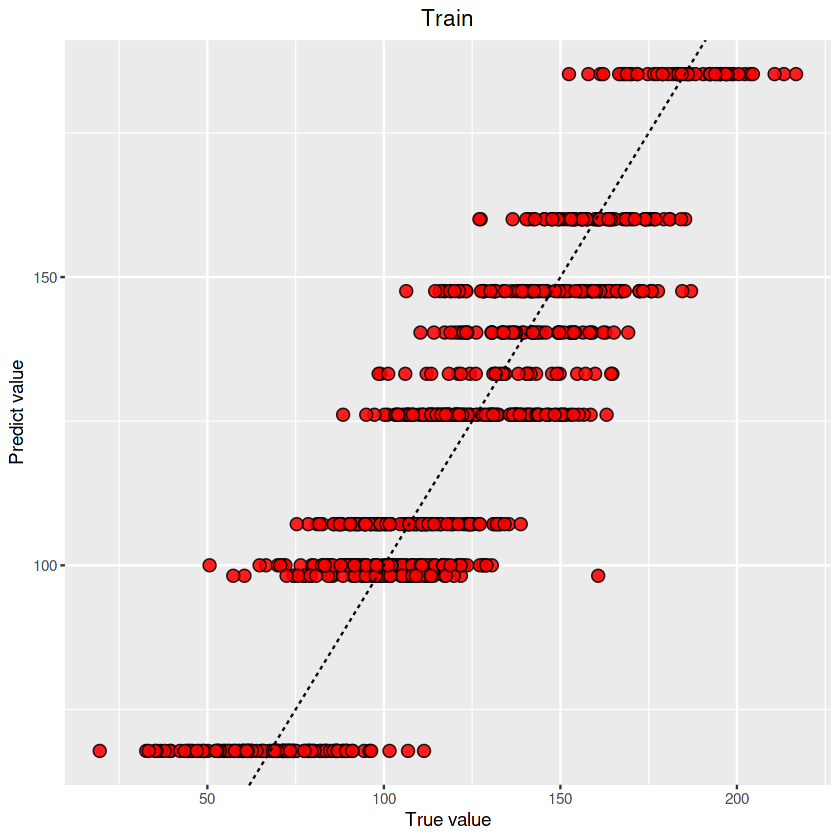

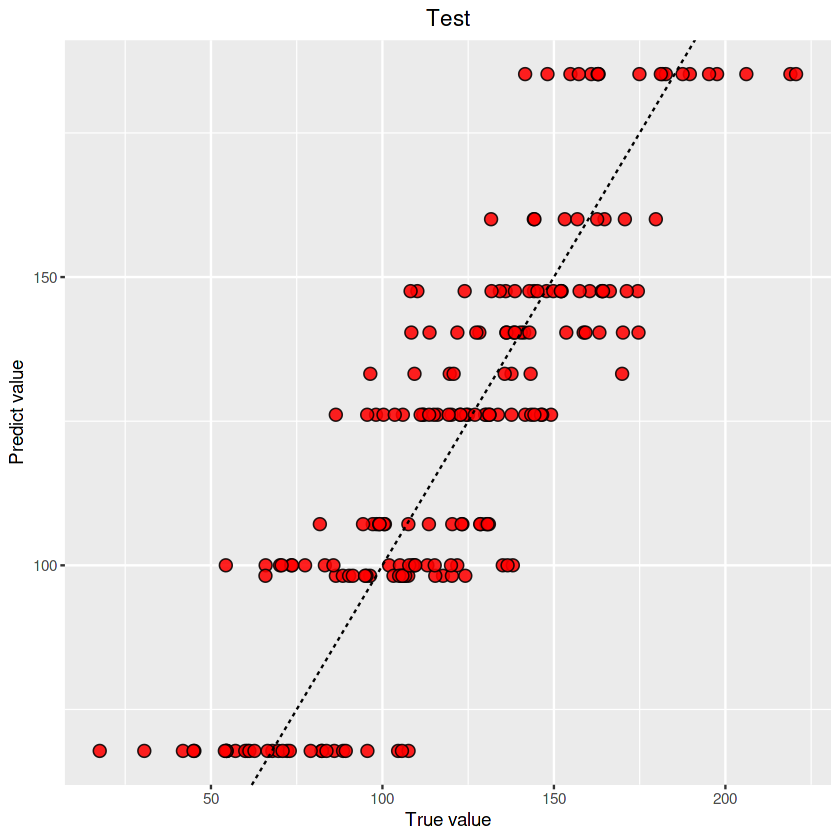

In [69]:
train_pred_tree <- predict(subset_tree, train)
test_pred_tree <- predict(subset_tree, test)

plot_trend(train_pred_tree, test_pred_tree)

**Observations**

* The value $R^2$ is not good, which means the proportion of the variance for `amount_paid` that's explained by response variable in a regression model
* See trends, we can see residuals is too much high, which mean too many point is far than zero

### 4.2.1. XGboost

XGBoost is a distributed gradient boosting library that has been developed to be very effective, adaptable, and portable. It uses the Gradient Boosting framework to construct machine learning algorithms. XGBoost offers a parallel tree boosting (also known as GBDT, GBM) that quickly and accurately resolves a variety of data science issues.

In this section, we use XGboost for regression tree to find the question of whether or not XGboost could work effectively on linear data.

Use `makeLearner` function to create default parameter for xgboost



In [70]:
xgb_learner <- makeLearner(
  "regr.xgboost",
  predict.type = "response",
  par.vals = list(
    objective = "reg:squarederror",
    eval_metric = "rmse",
    nrounds = 100,
    booster = "gblinear"
  )
)

Create `makeParamSet` function 

In [71]:
xgb_params <- makeParamSet(
    

  makeIntegerParam("nrounds", lower = 50, upper = 200),

  makeNumericParam("eta", lower = 0, upper = 0.1),
  
  makeNumericParam("lambda", lower = 0, upper = 0.1) 

)

**Prepare Data for xgboost**

In [72]:
trainTask <- makeRegrTask(data = train, target = "amount_paid")
testTask <- makeRegrTask(data = test, target = "amount_paid")

control <- makeTuneControlGrid(resolution = 3L)

resample_desc <- makeResampleDesc("CV", iters = 20)

**Training model**

In [73]:
tuned_params <- tuneParams(
  learner = xgb_learner,
  task = trainTask,
  resampling = resample_desc,
  par.set = xgb_params,
  control = control,
    show.info = FALSE
)

In [74]:
# Create a new model using tuned hyperparameters
xgb_tuned_learner <- setHyperPars(
  learner = xgb_learner,
  par.vals = tuned_params$x
)

xgb_model <- train(xgb_tuned_learner, trainTask)

getFeatureImportance(xgb_model)

FeatureImportance:
Task: train

Learner: regr.xgboost
Measure: NA
Contrast: NA
Aggregation: function (x)  x
Replace: NA
Number of Monte-Carlo iterations: NA
Local: FALSE
# A tibble: 6 × 2
  variable   importance
  <chr>           <dbl>
1 num_rooms     0.109  
2 num_people    1.02   
3 housearea     0.00902
4 is_ac        33.5    
5 is_tv        15.0    
6 is_flat      11.9    

In [75]:
print("---test----")
xgb_pred_test <- predict(xgb_model, testTask)

xgb_error <- get_error(test$amount_paid, xgb_pred_test$data$response)
xgb_error

[1] "---test----"


rmse     mse      r_square 
1 13.08303 171.1657 0.8666777

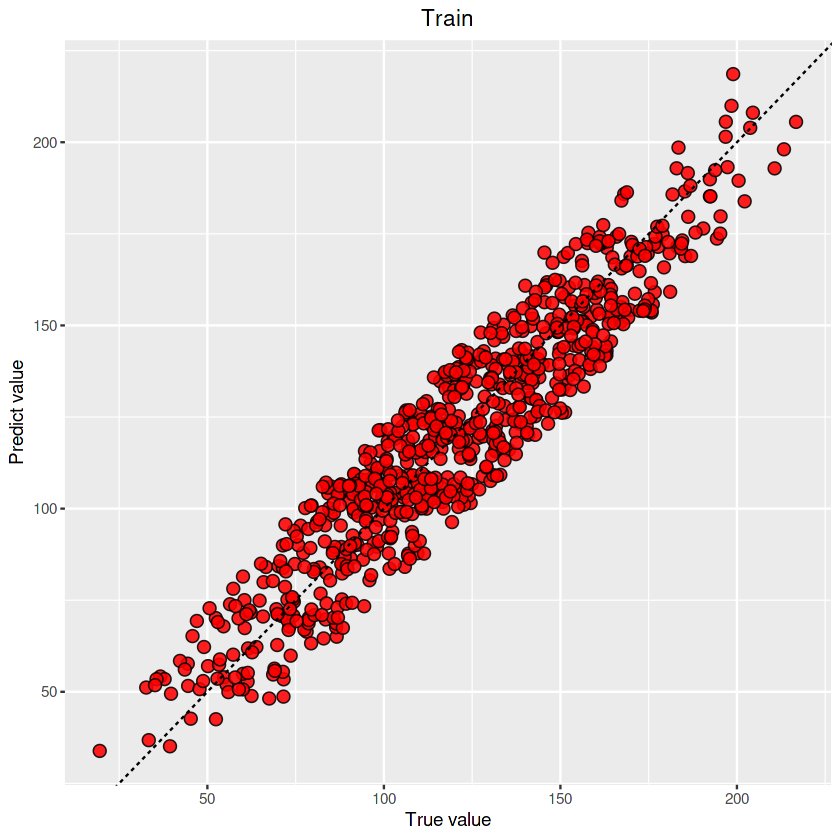

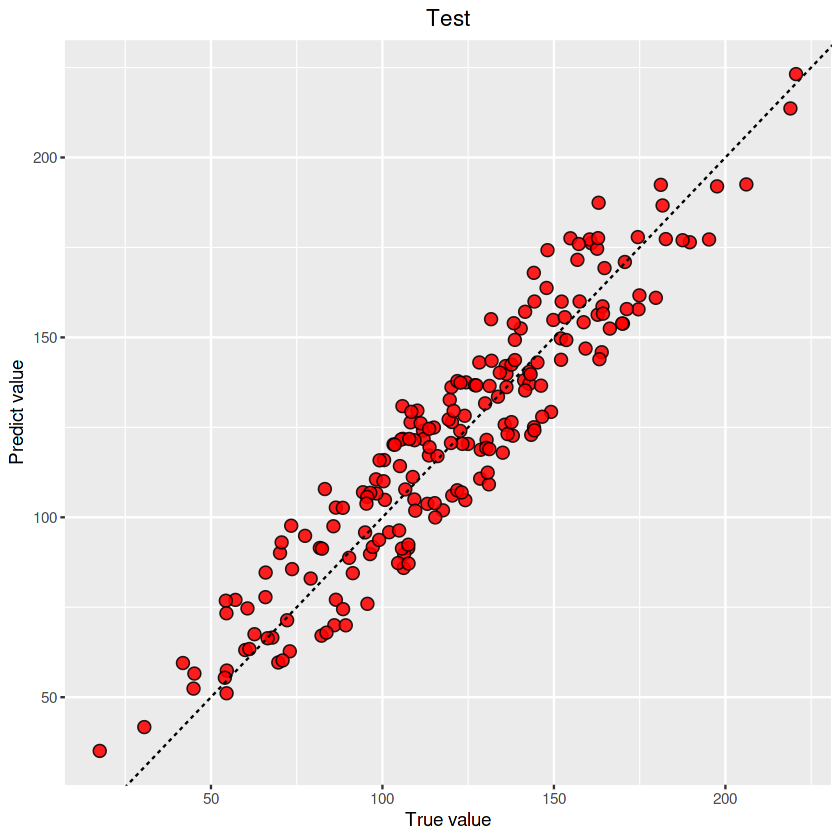

In [76]:
xgb_pred_train <- predict(xgb_model, trainTask)
xgb_pred_test <- predict(xgb_model, testTask)

df_train_xgb <- data.frame(cbind(xgb_pred_train$data$response, train$amount_paid))
names(df_train_xgb) <- c("predict_value", "true_value")

df_test_xgb <- data.frame(cbind(xgb_pred_test$data$response, test$amount_paid))
names(df_test_xgb) <- c("predict_value", "true_value")

plot_train_test(df_train_xgb, df_test_xgb, "true_value", "predict_value")

**Observations**

* The value $R^2$ is 86.67, which is the best model, and the model complexity is high enough because we are choosing low round wiht lower iteration to fit value, 
* time complexity is problems if we want to increase more rounds to reach higher fitted value and reduce residual
* as we can see the graph the residual is more likely near with abline than other model


### 4.2.1. Random forest

Becase we have a bit conflict between library `mlr` and `caret` therefore we will use to load only caret in this task

use `trainControl` to create k-fold cross validation

we import library `caret`

In [77]:
library(caret)


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:mlr’:

    train


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [78]:
repeat_cv <- trainControl(method='repeatedcv', number=10, repeats=5)

In [79]:
forest <- train(
        
        # Formula. We are using all variables to predict Species
        amount_paid~., 
        
        # Source of data; remove the Species variable
        data=train, 
        
        # `rf` method for random forest
        method='rf', 
        
        # Add repeated cross validation as trControl
        trControl=repeat_cv,
        
        # Accuracy to measure the performance of the model
        metric='RMSE')

## Print out the details about the model
forest$finalModel


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 199.7823
                    % Var explained: 84.62

In [80]:
rf_predict <- predict( forest, test)

In [89]:
get_error(test$amount_paid, rf_predict)


rmse     mse      r_square 
1 14.39435 207.1974 0.8294113

**Check important variables**

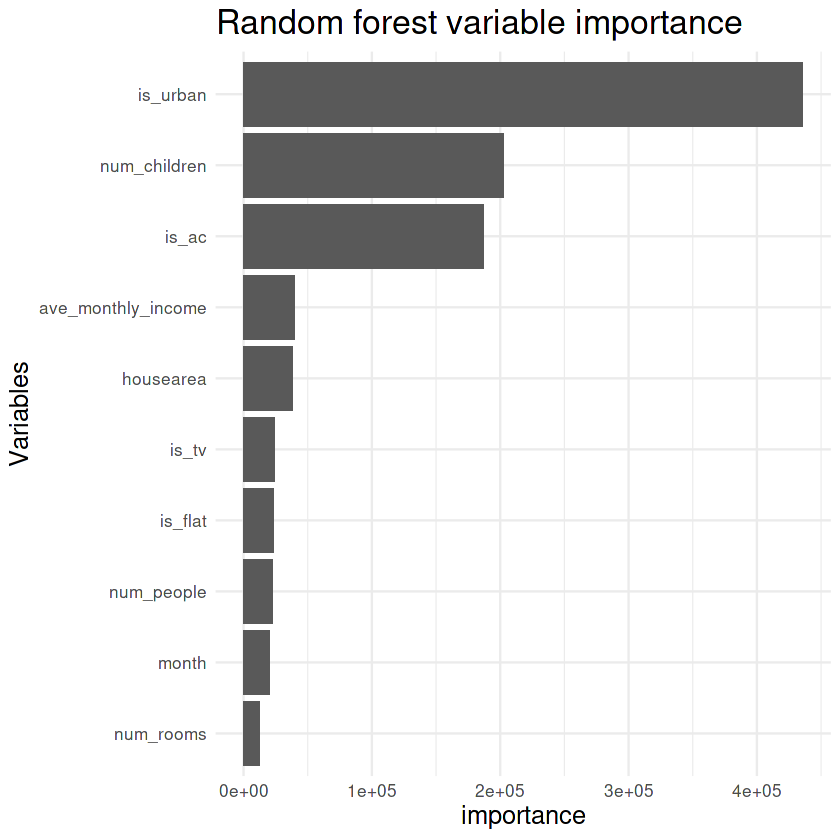

In [82]:
var_imp <- varImp(forest, scale=FALSE)$importance
var_imp <- data.frame(variables=row.names(var_imp), importance=var_imp$Overall)

## Create a plot of variable importance
var_imp %>%
        
        ## Sort the data by importance
        arrange(importance) %>%
        
        ## Create a ggplot object for aesthetic
        ggplot(aes(x=reorder(variables, importance), y=importance)) + 
        
        ## Plot the bar graph
        geom_bar(stat='identity') + 
        
        ## Flip the graph to make a horizontal bar plot
        coord_flip() + 
        
        ## Add x-axis label
        xlab('Variables') +
        
        ## Add a title
        labs(title='Random forest variable importance') + 
        
        ## Some layout for the plot
        theme_minimal() + 
        theme(axis.text = element_text(size = 10), 
              axis.title = element_text(size = 15), 
              plot.title = element_text(size = 20), 
              )

We train again and remove 2 last unimportant variables

In [83]:
forest <- train(amount_paid~., 
        data=subset(train, select = c(-num_rooms, -month) ),
        method='rf', 
        trControl=repeat_cv,
        metric='RMSE')

## Print out the details about the model
forest$finalModel

Warning message in train.default(x, y, weights = w, ...):
“The metric "mse" was not in the result set. RMSE will be used instead.”



Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 194.2538
                    % Var explained: 85.04

**Get error score**

In [90]:
rf_predict <- predict(
        object=forest, 
        newdata=test)
rf_error <- get_error(test$amount_paid, rf_predict)
rf_error

rmse     mse      r_square 
1 14.39435 207.1974 0.8294113

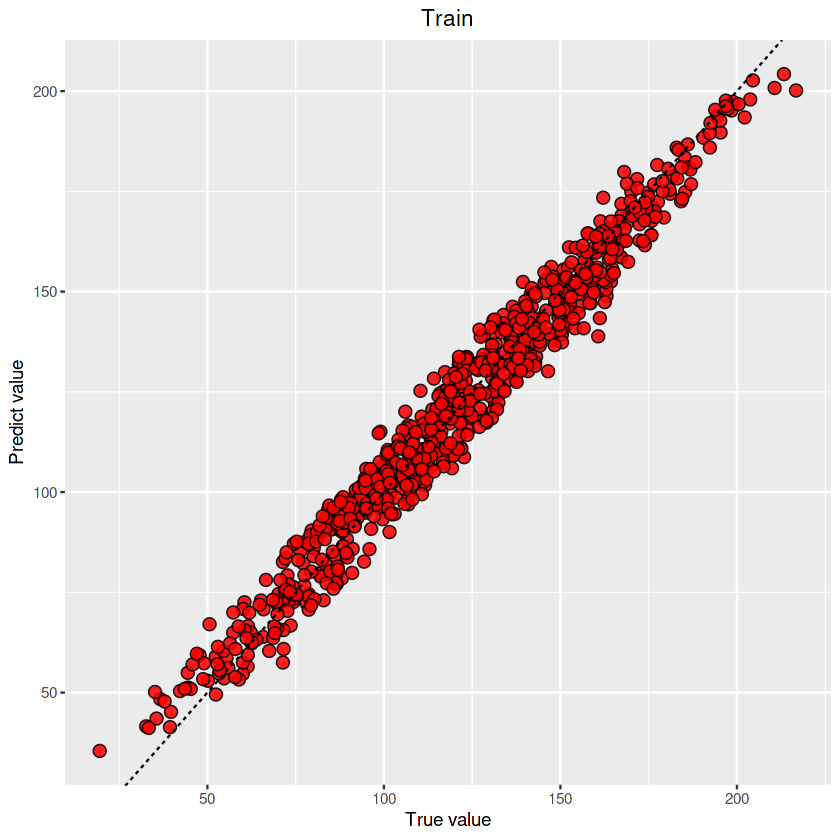

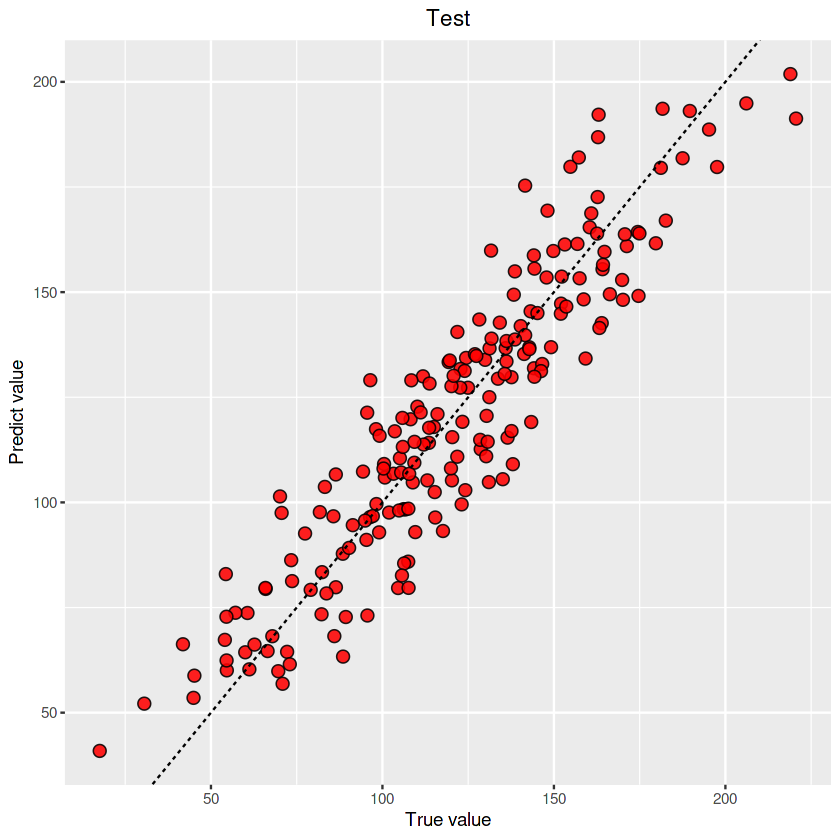

In [91]:
rf_test <- predict( forest, test)
rf_train <- predict(forest, train)

plot_trend(rf_train, rf_test)

**Observation**

As we can see the trends of Random forest, seem model is overfitting, because training data is too much fitted but, the residuals of test set is very high

## 4.4.Summary
In this section, the results of all 6 models on the test data are compared. Tablle below will list all of the metrics to evaluate which model is the best.

* For all total model, xgboost have a great score and fit the model with low iteration.
* Based on RMSE and MSE and $R^2$ Linear regression is the best for subset of dataset
* Model regression tree have a bad score from the last

In [92]:
name_model <- c("Linear regression", "subset_linear", "step_linear", "ridge", "lasso", "decision trees", "xgboost", "random_forest")
error_Df <- data.frame()

count = 0

for (i in name_model){
    count = count + 1
    error_Df[count,"Type"] <- i
}

error_score <- as.data.frame(rbind(lr_error, subset_lr_error, step_error, ridge_error, lasso_error, tree_error, xgb_error, rf_error))

final_score <- cbind(error_Df, error_score)
final_score

Type              rmse     mse      r_square 
1 Linear regression 13.14704 172.8446 0.8623449
2 subset_linear     13.11820 172.0871 0.8628825
3 step_linear       13.11820 172.0871 0.8628825
4 ridge             13.13889 172.6304 0.8615464
5 lasso             13.14630 172.8253 0.8621748
6 decision trees    19.07531 363.8674 0.6829456
7 xgboost           13.08303 171.1657 0.8666777
8 random_forest     14.39435 207.1974 0.8294113

[](http://)

## 5. Inference statistic <a class="anchor" id="sec_6"></a>

Several models were created and tested for prediction in the preceding section. The emphasis in this section is on inference. There is a link between predictors and responses.

Here, we want to analyse a highly interpretable model and, as a result, answer the aforementioned issue. Since the aim is observed that the xgboost model is not clearly interpretable eventhough it have a best score, even if appropriate explanations were supplied in the prior but not easily enterpretable. As a result, they consider from linear regression prediction results are picked.

Linear regression with subset is the model we have to opt in.

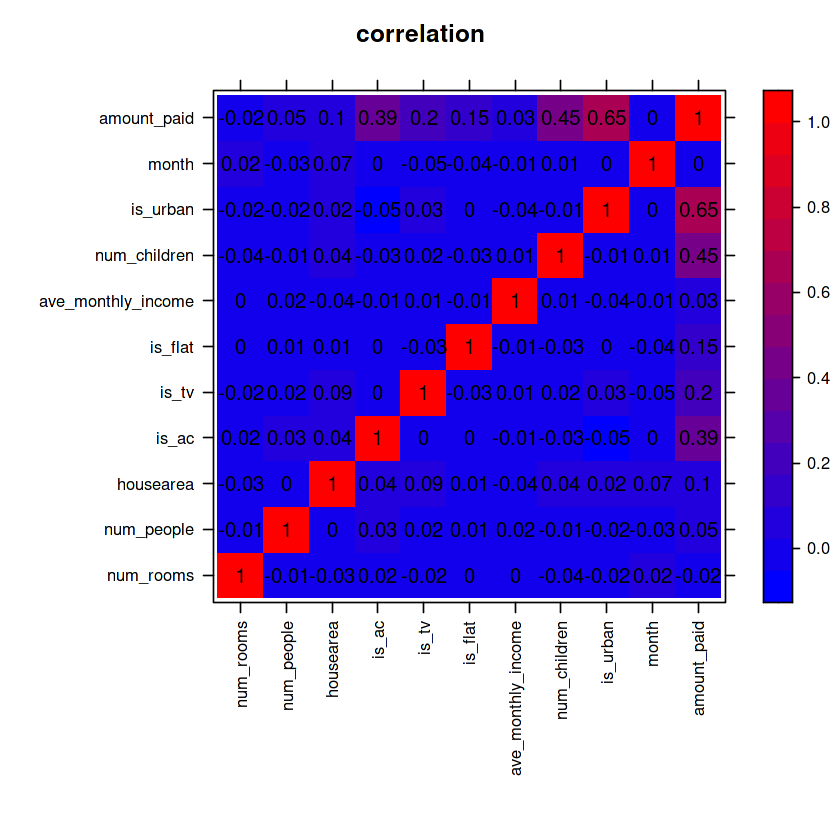

In [93]:
#Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("blue","red"))
#Plot the correlation matrix.
levelplot(cor(df), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

when we see about the correlation, we can remove immediately 2 variables which do not have influence to `amount_paid`

* `month` have 0
* `num_rooms` have -0.02

In [94]:
subset_lr_error

rmse    mse      r_square 
1 13.1182 172.0871 0.8628825

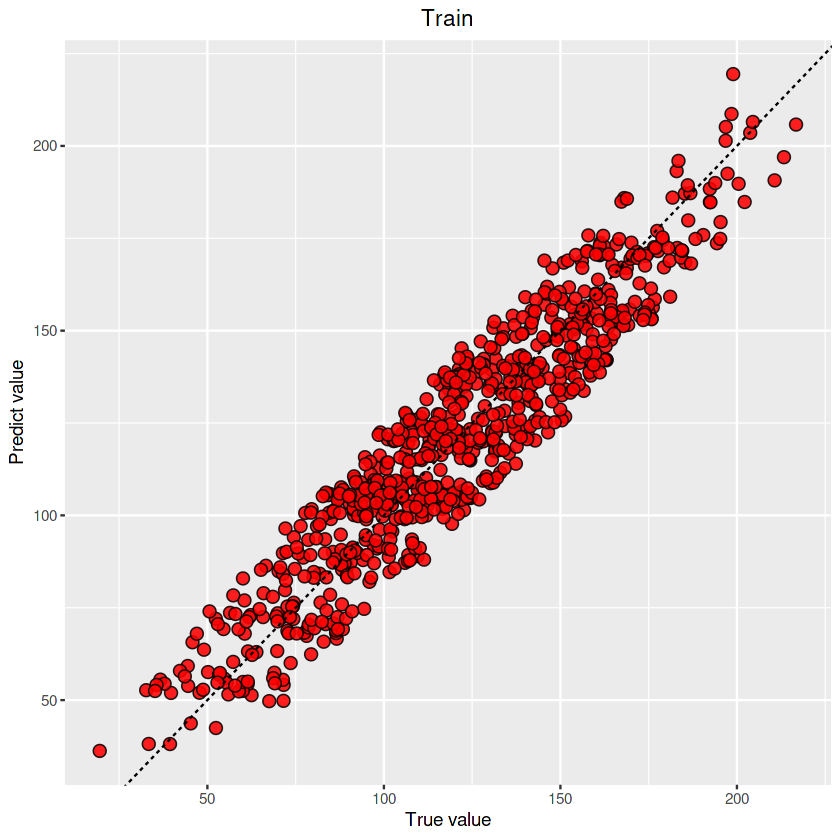

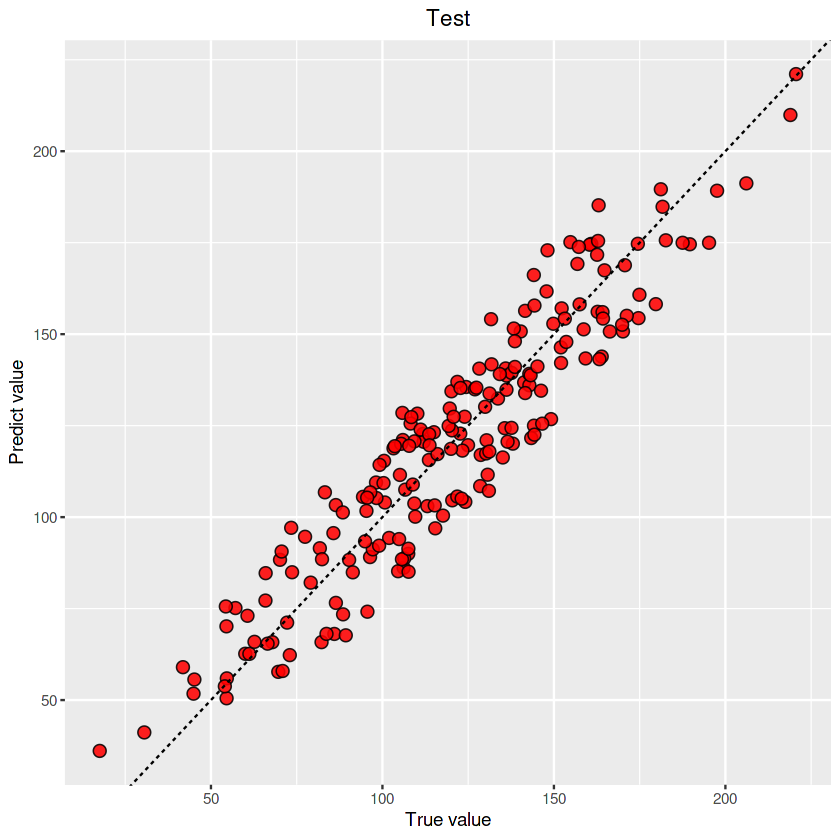

In [96]:
plot_trend(train_pred_subset_lr, test_pred_subset_lr)

In [97]:
summary(subset_lr)


Call:
lm(formula = amount_paid ~ ., data = subset(train, select = c(-num_rooms, 
    -month)))

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3442 -10.5299   0.2203   9.8015  24.6585 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.674e+01  3.145e+00   8.502  < 2e-16 ***
num_people         8.758e-01  2.260e-01   3.875 0.000116 ***
housearea          6.249e-03  3.031e-03   2.062 0.039525 *  
is_ac              3.330e+01  9.233e-01  36.060  < 2e-16 ***
is_tv              1.435e+01  1.122e+00  12.795  < 2e-16 ***
is_flat            1.159e+01  8.939e-01  12.966  < 2e-16 ***
ave_monthly_income 3.635e-04  9.543e-05   3.809 0.000151 ***
num_children       1.822e+01  4.863e-01  37.468  < 2e-16 ***
is_urban           5.011e+01  9.192e-01  54.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.49 on 777 degrees of freedom
Multiple R-squared:  0.8812,	Adjusted R-squared:  

Based on the intercept and coefficient of the linear regression model, the equation for model can be expressed following by:

**Formula of regression**

$[amount\_paid] = 26.74 +  0 * [num\_rooms] + 0.8758 * [num\_people] + 0.006249[housearea] +  33.3* [is\_ac] +  14.35* [is\_tv] 11.59* [is\_flat] +  0.0003635[ave\_monthly\_income] +  18.22 * [num\_children] +  50.11[is\_urban] +  0 *[month]$

**Observation**

* coefficients of this model is all higher than 0 after we fitted model, before that the variable `num_rooms` have negative coefficients
* And all coefficients is have a good significant level to reject null hypothesis
* F-statistic of models is 720.7 is quite good.
* `is_urban` and `is_ac` have the most affect to amount_paid with high positive correlation
* Residuals are around mean equal 0
* $R^2$ is 0.8628, which means the model can explain 86.28 of the variance in the `amount_paid` to the rest of predictors
* P-value is very low, model is much good to reject null hypothesis 


      
     

In [111]:
2.2e-16

[1] 2.2e-16

## 6. Conclusion<a class="anchor" id="sec_7"></a>

In this analysis we just do explored and analyse to build the models that can predict the amount of paid. Finally we have some conclusion for this Assignment


**Exploration Data Analysis**:

* We know how the distribution of dataset through using histogram and boxplot, The data set have a good distribution nearly in normal distribution in some variables and uniorm distribution of value have 0 and 1
* There are some wrong values in data such as number of people could not be negative in reality .
* The correlation illustrates very clear how strong relationship between predictors and target variables. This will help us to choose good predictors for model.

**Model development**:
* Linear regression is easy to use with low model complexity and time complexity and interpret at ease.
* Use `subset` unimportant variables we could get higher predict like example linear regression and random forest.
* Decision tree is not a good models to develope for linear models with high residual value
* Random forest is taking too much time without a good value of prediction
* Xgboost with linear booster have a best score with easy tunning, this model can upgrape could be more fitted value, but not be easy for prediction and model complexity and time complexity is higher than linear regression if the data is larger.

**Inference task**:
* In this task, we are confirmed once again to choose variables from correlation, 
* Expressing multiple meaningful value include F-statistic, P-value, ...

**R programming language**
* R packages is very strong to create models faster
* with support of tidyverse, we can combine more packages together


## 7. References <a class="anchor" id="sec_8"></a>

[1] Hadley Wickham, Mara Averick, Jennifer Bryan, Winston Chang, Lucy D'Agostino McGowan, Romain François, Garrett Grolemund, Alex Hayes, Lionel Henry, Jim Hester, Max Kuhn, Thomas Lin Pedersen, Evan Miller, Stephan Milton Bache, Kirill Müller, Jeroen Ooms, David Robinson, Dana Paige Seidel, Vitalie Spinu, Kohske Takahashi, Davis Vaughan, Claus Wilke, Kara Woo, & Hiroaki Yutani (2019). Welcome to the tidyverse. Journal of Open Source Software, 4(43), 1686.

[2] Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (pp. 785–794). New York, NY, USA: ACM. https://doi.org/10.1145/2939672.2939785

[3] Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). An introduction to statistical learning : with applications in R. New York :Springer,

